In [5]:
import matplotlib.pyplot as plt

import numpy as np

from qiskit import Aer, QuantumCircuit
from qiskit.utils import QuantumInstance
from qiskit.algorithms import IterativeAmplitudeEstimation, EstimationProblem, AmplitudeEstimation
from qiskit.circuit.library import LinearAmplitudeFunction
from qiskit_finance.circuit.library import LogNormalDistribution

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram
import math

from qiskit import IBMQ
ibm_token = 'f42d45ee0b069b6c08e97fca17c15f5bac11363126fbbf31436bdbb522fd9c53bbed7cf41eb3d40d3f5653c54096c80ccf0231a6a258795ad5e66f0bf3fafeae' # https://quantum-computing.ibm.com/account
ibmq_account = IBMQ.enable_account(ibm_token)
ibmq_provider = IBMQ.get_provider(hub='ibm-q-skku', group='snu', project='snu-students')

In [6]:
ibmq_backend_real = ibmq_provider.get_backend('ibmq_jakarta')
aer_backend = Aer.get_backend("aer_simulator")

In [7]:
import numpy as np
from qiskit.circuit import QuantumCircuit
from qiskit.circuit.library import XGate, YGate
from qiskit.transpiler import PassManager, InstructionDurations
from qiskit.transpiler.passes import ALAPSchedule, DynamicalDecoupling
from qiskit.visualization import timeline_drawer

In [8]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler

# Save your credentials on disk.
# QiskitRuntimeService.save_account(channel='ibm_quantum', token=ibm_token)

service = QiskitRuntimeService()

lima openpulse support: True


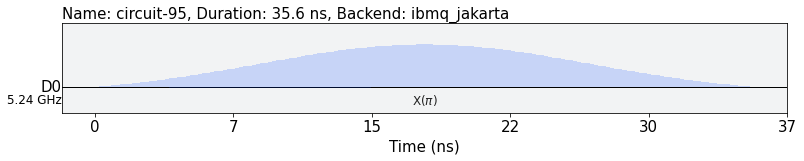

In [7]:
from qiskit import schedule, QuantumCircuit, transpile, IBMQ

circuit = QuantumCircuit(1)
circuit.x(0)
circuit.barrier(0)
circuit_t = transpile(circuit, ibmq_backend_real )
print('lima openpulse support:', ibmq_backend_real.configuration().open_pulse)

schedule(circuit_t, ibmq_backend_real).draw(backend=ibmq_backend_real, time_unit='ns')


In [37]:
def circn(n):
    circ = QuantumCircuit(7)
    for i in range(n):
        circ.x(range(1,7))
        circ.y(range(1,7))
    circ.measure(0)

durations = InstructionDurations(
    [("reset", None, 10),("cx", [0, 1], 700),
     ("x", None, 40),("y", None, 40), ("measure", None, 1000)]
)

In [11]:
dd_sequence = [XGate(), YGate(),XGate(), YGate()]
from qiskit import schedule, QuantumCircuit, transpile, IBMQ

In [14]:
def cirr(n):
    circ = QuantumCircuit(7,7)
    for i in range(2*n):
        circ.x(range(1,7))
        circ.y(range(1,7))
    circ.measure_all()
    durations = InstructionDurations(
        [("reset", None, 10),("cx", [0, 1], 700),
        ("x", None, 40),("y", None, 40), ("measure", None, 1000)]
    )
    dd_sequence = [XGate(), XGate()]
    pm = PassManager([ALAPSchedule(durations),
                    DynamicalDecoupling(durations, dd_sequence)])

    circ_dd = pm.run(circ)
    transpiled_circ = transpile(circ_dd, ibmq_backend_real)
    return  transpiled_circ 
# options = {'backend_name': 'ibmq_jakarta'}
# circuits=[cirr(n) for n in range(50)]
# job = service.run(program_id="sampler",
#                   options=options,
#                   inputs=circuits)
with Sampler(circuits=[cirr(n) for n in range(50)], service=service, options={ 'backend_name': 'ibmq_jakarta'}) as sampler:
    result = sampler(circuit_indices=[i in range(50)], shots=2000)

/home/justids/anaconda3/envs/qiskit/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: __call__ keyword argument circuit_indices is deprecated and replaced with circuits.


RuntimeJobFailureError: 'Unable to retrieve job result. Job casv848nvf39qe4jqkn0 has failed:\n2022-06-27T18:27:03.049304550Z INFO:jaeger_tracing:Initializing Jaeger Tracer with UDP reporter\n2022-06-27T18:27:03.052636568Z INFO:jaeger_tracing:Using sampler ConstSampler(True)\n2022-06-27T18:27:03.053452319Z INFO:jaeger_tracing:opentracing.tracer initialized to <jaeger_client.tracer.Tracer object at 0x7fdc1aae0580>[app_name=ntc-job]\n2022-06-27T18:27:03.117483000Z INFO:programruntime.program_starter_wrapper:Executing program.py (job casv848nvf39qe4jqkn0)\n2022-06-27T18:27:03.137891649Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.01001 (ms)\n2022-06-27T18:27:03.137926338Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04458 (ms)\n2022-06-27T18:27:03.137976814Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.01359 (ms)\n2022-06-27T18:27:03.138088126Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.06461 (ms)\n2022-06-27T18:27:03.138167240Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.04530 (ms)\n2022-06-27T18:27:03.138232713Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.02360 (ms)\n2022-06-27T18:27:03.138268581Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00739 (ms)\n2022-06-27T18:27:03.139201747Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.87142 (ms)\n2022-06-27T18:27:03.139281064Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.02909 (ms)\n2022-06-27T18:27:03.139383238Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.06366 (ms)\n2022-06-27T18:27:03.139440206Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.02360 (ms)\n2022-06-27T18:27:03.139513161Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.139612771Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.139835857Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.139885189Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.139930231Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.45228 (ms)\n2022-06-27T18:27:03.139975636Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00930 (ms)\n2022-06-27T18:27:03.140037743Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.02766 (ms)\n2022-06-27T18:27:03.140077323Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00978 (ms)\n2022-06-27T18:27:03.140111786Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00596 (ms)\n2022-06-27T18:27:03.140142344Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.140198830Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.02146 (ms)\n2022-06-27T18:27:03.140249137Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01812 (ms)\n2022-06-27T18:27:03.140336953Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04697 (ms)\n2022-06-27T18:27:03.140383767Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01597 (ms)\n2022-06-27T18:27:03.140438141Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.140468956Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.140660243Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.140708620Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.140740475Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.32520 (ms)\n2022-06-27T18:27:03.140786452Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01431 (ms)\n2022-06-27T18:27:03.140819172Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00525 (ms)\n2022-06-27T18:27:03.140849967Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00453 (ms)\n2022-06-27T18:27:03.140880201Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00429 (ms)\n2022-06-27T18:27:03.140918787Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00477 (ms)\n2022-06-27T18:27:03.140966165Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01431 (ms)\n2022-06-27T18:27:03.141002592Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00525 (ms)\n2022-06-27T18:27:03.142929769Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00310 (ms)\n2022-06-27T18:27:03.142987781Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02098 (ms)\n2022-06-27T18:27:03.143031246Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.01097 (ms)\n2022-06-27T18:27:03.143117340Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04673 (ms)\n2022-06-27T18:27:03.143160427Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01550 (ms)\n2022-06-27T18:27:03.143211622Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01478 (ms)\n2022-06-27T18:27:03.143243568Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00453 (ms)\n2022-06-27T18:27:03.143588874Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.30613 (ms)\n2022-06-27T18:27:03.143651149Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01812 (ms)\n2022-06-27T18:27:03.143732622Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04697 (ms)\n2022-06-27T18:27:03.143782183Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01740 (ms)\n2022-06-27T18:27:03.143841656Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.143871229Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.144137042Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.144188305Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.144221879Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.40698 (ms)\n2022-06-27T18:27:03.144263036Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00787 (ms)\n2022-06-27T18:27:03.144309478Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01478 (ms)\n2022-06-27T18:27:03.144352394Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.01359 (ms)\n2022-06-27T18:27:03.144383893Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00429 (ms)\n2022-06-27T18:27:03.144418643Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00453 (ms)\n2022-06-27T18:27:03.144468800Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.02003 (ms)\n2022-06-27T18:27:03.144517523Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01574 (ms)\n2022-06-27T18:27:03.144594503Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04554 (ms)\n2022-06-27T18:27:03.144641611Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01669 (ms)\n2022-06-27T18:27:03.144703259Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.144726660Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.144986957Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.145027172Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.145059620Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.38695 (ms)\n2022-06-27T18:27:03.145106212Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01383 (ms)\n2022-06-27T18:27:03.145139338Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00501 (ms)\n2022-06-27T18:27:03.145169753Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00358 (ms)\n2022-06-27T18:27:03.145200037Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00429 (ms)\n2022-06-27T18:27:03.145235066Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00310 (ms)\n2022-06-27T18:27:03.145390829Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.12016 (ms)\n2022-06-27T18:27:03.145439781Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01454 (ms)\n2022-06-27T18:27:03.145474668Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00358 (ms)\n2022-06-27T18:27:03.147298490Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00310 (ms)\n2022-06-27T18:27:03.147363694Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02813 (ms)\n2022-06-27T18:27:03.147407532Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.01025 (ms)\n2022-06-27T18:27:03.147488686Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04244 (ms)\n2022-06-27T18:27:03.147533222Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01502 (ms)\n2022-06-27T18:27:03.147583146Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01311 (ms)\n2022-06-27T18:27:03.147614250Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00334 (ms)\n2022-06-27T18:27:03.147951992Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.29898 (ms)\n2022-06-27T18:27:03.148012612Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01764 (ms)\n2022-06-27T18:27:03.148094220Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04601 (ms)\n2022-06-27T18:27:03.148144127Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01717 (ms)\n2022-06-27T18:27:03.148200574Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.148232052Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.148504942Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.148554078Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.148587616Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.41199 (ms)\n2022-06-27T18:27:03.148629266Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00787 (ms)\n2022-06-27T18:27:03.148674170Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01335 (ms)\n2022-06-27T18:27:03.148708930Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00691 (ms)\n2022-06-27T18:27:03.148740619Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00405 (ms)\n2022-06-27T18:27:03.148770916Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00429 (ms)\n2022-06-27T18:27:03.148818288Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01717 (ms)\n2022-06-27T18:27:03.148863751Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01478 (ms)\n2022-06-27T18:27:03.148937851Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04315 (ms)\n2022-06-27T18:27:03.148984367Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01669 (ms)\n2022-06-27T18:27:03.149039579Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.149069069Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.149345348Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.149390251Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.149423613Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.40436 (ms)\n2022-06-27T18:27:03.149532572Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01359 (ms)\n2022-06-27T18:27:03.149532572Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00525 (ms)\n2022-06-27T18:27:03.149553939Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00358 (ms)\n2022-06-27T18:27:03.149565734Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.149602618Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00310 (ms)\n2022-06-27T18:27:03.149737425Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.10252 (ms)\n2022-06-27T18:27:03.149785072Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01383 (ms)\n2022-06-27T18:27:03.149819031Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00358 (ms)\n2022-06-27T18:27:03.151772629Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00286 (ms)\n2022-06-27T18:27:03.151791427Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02098 (ms)\n2022-06-27T18:27:03.151823572Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.00978 (ms)\n2022-06-27T18:27:03.151902379Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04268 (ms)\n2022-06-27T18:27:03.151945668Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01454 (ms)\n2022-06-27T18:27:03.151995334Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01264 (ms)\n2022-06-27T18:27:03.152025270Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00334 (ms)\n2022-06-27T18:27:03.152375664Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.30947 (ms)\n2022-06-27T18:27:03.152440859Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01836 (ms)\n2022-06-27T18:27:03.152521023Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04625 (ms)\n2022-06-27T18:27:03.152570353Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01740 (ms)\n2022-06-27T18:27:03.152628201Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.152659545Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.152916081Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.152968729Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.153002462Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.40054 (ms)\n2022-06-27T18:27:03.153044703Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00787 (ms)\n2022-06-27T18:27:03.153090407Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01359 (ms)\n2022-06-27T18:27:03.153124270Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00644 (ms)\n2022-06-27T18:27:03.153157292Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.153186581Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00453 (ms)\n2022-06-27T18:27:03.153233751Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01764 (ms)\n2022-06-27T18:27:03.153279400Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01454 (ms)\n2022-06-27T18:27:03.153364690Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.05341 (ms)\n2022-06-27T18:27:03.153411878Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01717 (ms)\n2022-06-27T18:27:03.153466852Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.153496301Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.153744997Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.153795673Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.153828505Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.38552 (ms)\n2022-06-27T18:27:03.153874611Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01335 (ms)\n2022-06-27T18:27:03.153908031Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00525 (ms)\n2022-06-27T18:27:03.153938725Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00358 (ms)\n2022-06-27T18:27:03.153969607Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00381 (ms)\n2022-06-27T18:27:03.154004646Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00334 (ms)\n2022-06-27T18:27:03.154132330Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09418 (ms)\n2022-06-27T18:27:03.154179346Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01359 (ms)\n2022-06-27T18:27:03.154214144Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00358 (ms)\n2022-06-27T18:27:03.156028027Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00238 (ms)\n2022-06-27T18:27:03.156084370Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02003 (ms)\n2022-06-27T18:27:03.156127678Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.00930 (ms)\n2022-06-27T18:27:03.156209244Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04292 (ms)\n2022-06-27T18:27:03.156253710Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01454 (ms)\n2022-06-27T18:27:03.156302172Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01264 (ms)\n2022-06-27T18:27:03.156340476Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00334 (ms)\n2022-06-27T18:27:03.156672877Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.29373 (ms)\n2022-06-27T18:27:03.156734493Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01788 (ms)\n2022-06-27T18:27:03.156815181Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04625 (ms)\n2022-06-27T18:27:03.156863926Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01740 (ms)\n2022-06-27T18:27:03.156921358Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.156951951Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.157205139Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.157256637Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.157290267Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39458 (ms)\n2022-06-27T18:27:03.157339589Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00763 (ms)\n2022-06-27T18:27:03.157385699Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01335 (ms)\n2022-06-27T18:27:03.157419477Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00596 (ms)\n2022-06-27T18:27:03.157450654Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00358 (ms)\n2022-06-27T18:27:03.157481583Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00453 (ms)\n2022-06-27T18:27:03.157528784Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01717 (ms)\n2022-06-27T18:27:03.157574354Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01478 (ms)\n2022-06-27T18:27:03.157649404Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04315 (ms)\n2022-06-27T18:27:03.157696160Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01669 (ms)\n2022-06-27T18:27:03.157753963Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.157783679Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.158034404Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.158089835Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.158123708Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39601 (ms)\n2022-06-27T18:27:03.158169560Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01335 (ms)\n2022-06-27T18:27:03.158202285Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00525 (ms)\n2022-06-27T18:27:03.158232990Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00358 (ms)\n2022-06-27T18:27:03.158262868Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.158297396Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00310 (ms)\n2022-06-27T18:27:03.158437198Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.10490 (ms)\n2022-06-27T18:27:03.158485381Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01383 (ms)\n2022-06-27T18:27:03.158520165Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00381 (ms)\n2022-06-27T18:27:03.160334636Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00238 (ms)\n2022-06-27T18:27:03.160392684Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02074 (ms)\n2022-06-27T18:27:03.160436926Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.00978 (ms)\n2022-06-27T18:27:03.160518023Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04244 (ms)\n2022-06-27T18:27:03.160562092Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01478 (ms)\n2022-06-27T18:27:03.160611105Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01287 (ms)\n2022-06-27T18:27:03.160642229Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00334 (ms)\n2022-06-27T18:27:03.160976640Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.29516 (ms)\n2022-06-27T18:27:03.161038004Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01812 (ms)\n2022-06-27T18:27:03.161118957Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04601 (ms)\n2022-06-27T18:27:03.161168357Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01740 (ms)\n2022-06-27T18:27:03.161226184Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.161257365Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.161517919Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.161570674Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.161603947Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.40340 (ms)\n2022-06-27T18:27:03.161645077Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00787 (ms)\n2022-06-27T18:27:03.161691220Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01383 (ms)\n2022-06-27T18:27:03.161726341Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00644 (ms)\n2022-06-27T18:27:03.161758200Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00405 (ms)\n2022-06-27T18:27:03.161788084Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.161835135Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01740 (ms)\n2022-06-27T18:27:03.161880521Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01478 (ms)\n2022-06-27T18:27:03.161959093Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04697 (ms)\n2022-06-27T18:27:03.162006689Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01717 (ms)\n2022-06-27T18:27:03.162061678Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.162090564Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.162343164Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.162393291Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.162426262Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.38862 (ms)\n2022-06-27T18:27:03.162473295Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01359 (ms)\n2022-06-27T18:27:03.162506222Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00572 (ms)\n2022-06-27T18:27:03.162536703Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00358 (ms)\n2022-06-27T18:27:03.162567771Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00429 (ms)\n2022-06-27T18:27:03.162602958Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00334 (ms)\n2022-06-27T18:27:03.162731302Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09537 (ms)\n2022-06-27T18:27:03.162778503Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01335 (ms)\n2022-06-27T18:27:03.162813169Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00358 (ms)\n2022-06-27T18:27:03.164702015Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00286 (ms)\n2022-06-27T18:27:03.164759295Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02074 (ms)\n2022-06-27T18:27:03.164802785Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.00978 (ms)\n2022-06-27T18:27:03.164883599Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04292 (ms)\n2022-06-27T18:27:03.164927588Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01431 (ms)\n2022-06-27T18:27:03.164976341Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01264 (ms)\n2022-06-27T18:27:03.165007515Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00334 (ms)\n2022-06-27T18:27:03.165345635Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.29230 (ms)\n2022-06-27T18:27:03.165407545Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01788 (ms)\n2022-06-27T18:27:03.165489119Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04625 (ms)\n2022-06-27T18:27:03.165538005Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01764 (ms)\n2022-06-27T18:27:03.165594694Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.165625707Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.165877815Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.165927664Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.165961016Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39148 (ms)\n2022-06-27T18:27:03.166001642Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00763 (ms)\n2022-06-27T18:27:03.166046575Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01335 (ms)\n2022-06-27T18:27:03.166080305Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00572 (ms)\n2022-06-27T18:27:03.166111182Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00358 (ms)\n2022-06-27T18:27:03.166141457Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00381 (ms)\n2022-06-27T18:27:03.166187692Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01717 (ms)\n2022-06-27T18:27:03.166232970Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01454 (ms)\n2022-06-27T18:27:03.166306812Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04244 (ms)\n2022-06-27T18:27:03.166371269Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.02289 (ms)\n2022-06-27T18:27:03.166427004Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.166457253Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.166705679Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.166761431Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.166794987Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39244 (ms)\n2022-06-27T18:27:03.166841158Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01335 (ms)\n2022-06-27T18:27:03.166874813Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00525 (ms)\n2022-06-27T18:27:03.166904892Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.166935178Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.166969332Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00310 (ms)\n2022-06-27T18:27:03.167096868Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09465 (ms)\n2022-06-27T18:27:03.167144315Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01335 (ms)\n2022-06-27T18:27:03.167179596Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00381 (ms)\n2022-06-27T18:27:03.168985481Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00286 (ms)\n2022-06-27T18:27:03.169041493Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02003 (ms)\n2022-06-27T18:27:03.169084340Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.00978 (ms)\n2022-06-27T18:27:03.169165057Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04244 (ms)\n2022-06-27T18:27:03.169209121Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01431 (ms)\n2022-06-27T18:27:03.169258530Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01264 (ms)\n2022-06-27T18:27:03.169289737Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00334 (ms)\n2022-06-27T18:27:03.169622248Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.29325 (ms)\n2022-06-27T18:27:03.169683869Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01812 (ms)\n2022-06-27T18:27:03.169761038Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04339 (ms)\n2022-06-27T18:27:03.169810245Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01717 (ms)\n2022-06-27T18:27:03.169866923Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.169897489Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.170148896Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.170198748Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.170231681Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39029 (ms)\n2022-06-27T18:27:03.170271942Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00739 (ms)\n2022-06-27T18:27:03.170318928Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01335 (ms)\n2022-06-27T18:27:03.170359105Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00644 (ms)\n2022-06-27T18:27:03.170391114Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.170421976Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.170469537Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01740 (ms)\n2022-06-27T18:27:03.170515171Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01454 (ms)\n2022-06-27T18:27:03.170593362Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04649 (ms)\n2022-06-27T18:27:03.170641283Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01693 (ms)\n2022-06-27T18:27:03.170696628Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.170726240Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.170972168Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.171022264Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.171055349Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.38266 (ms)\n2022-06-27T18:27:03.171101111Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01264 (ms)\n2022-06-27T18:27:03.171134596Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00548 (ms)\n2022-06-27T18:27:03.171165175Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00358 (ms)\n2022-06-27T18:27:03.171195152Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00429 (ms)\n2022-06-27T18:27:03.171229844Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00310 (ms)\n2022-06-27T18:27:03.171365429Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.10157 (ms)\n2022-06-27T18:27:03.171412848Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01359 (ms)\n2022-06-27T18:27:03.171447504Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00358 (ms)\n2022-06-27T18:27:03.173249313Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00286 (ms)\n2022-06-27T18:27:03.173308372Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02313 (ms)\n2022-06-27T18:27:03.173362122Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.01836 (ms)\n2022-06-27T18:27:03.173442792Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04268 (ms)\n2022-06-27T18:27:03.173487673Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01431 (ms)\n2022-06-27T18:27:03.173536828Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01311 (ms)\n2022-06-27T18:27:03.173568710Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00310 (ms)\n2022-06-27T18:27:03.173905177Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.29755 (ms)\n2022-06-27T18:27:03.173966078Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01764 (ms)\n2022-06-27T18:27:03.174046750Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04554 (ms)\n2022-06-27T18:27:03.174095043Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01717 (ms)\n2022-06-27T18:27:03.174151819Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.174182172Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.174445053Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.174494681Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.174530311Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.40102 (ms)\n2022-06-27T18:27:03.174569001Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00763 (ms)\n2022-06-27T18:27:03.174614130Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01335 (ms)\n2022-06-27T18:27:03.174647930Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00596 (ms)\n2022-06-27T18:27:03.174679592Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00405 (ms)\n2022-06-27T18:27:03.174710180Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.174757055Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01740 (ms)\n2022-06-27T18:27:03.174803149Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01478 (ms)\n2022-06-27T18:27:03.174877482Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04363 (ms)\n2022-06-27T18:27:03.174924398Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01693 (ms)\n2022-06-27T18:27:03.174979472Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.175009090Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.175253818Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.175303619Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.175343446Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.38052 (ms)\n2022-06-27T18:27:03.175389491Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01311 (ms)\n2022-06-27T18:27:03.175423184Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00548 (ms)\n2022-06-27T18:27:03.175454143Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.175484523Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00429 (ms)\n2022-06-27T18:27:03.175519573Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00286 (ms)\n2022-06-27T18:27:03.175647206Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09465 (ms)\n2022-06-27T18:27:03.175694671Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01383 (ms)\n2022-06-27T18:27:03.175728534Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00334 (ms)\n2022-06-27T18:27:03.177617266Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00310 (ms)\n2022-06-27T18:27:03.177674634Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02050 (ms)\n2022-06-27T18:27:03.177717304Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.00954 (ms)\n2022-06-27T18:27:03.177797985Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04244 (ms)\n2022-06-27T18:27:03.177842134Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01454 (ms)\n2022-06-27T18:27:03.177890420Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01264 (ms)\n2022-06-27T18:27:03.177921456Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00334 (ms)\n2022-06-27T18:27:03.178254633Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.29445 (ms)\n2022-06-27T18:27:03.178322803Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01812 (ms)\n2022-06-27T18:27:03.178414593Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04673 (ms)\n2022-06-27T18:27:03.178464753Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01740 (ms)\n2022-06-27T18:27:03.178522235Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.178553420Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.178808333Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.178858473Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.178891820Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39554 (ms)\n2022-06-27T18:27:03.178932406Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00739 (ms)\n2022-06-27T18:27:03.178977768Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01335 (ms)\n2022-06-27T18:27:03.179012916Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00644 (ms)\n2022-06-27T18:27:03.179043885Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.179075460Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.179122002Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01693 (ms)\n2022-06-27T18:27:03.179167011Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01454 (ms)\n2022-06-27T18:27:03.179241800Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04315 (ms)\n2022-06-27T18:27:03.179288694Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01693 (ms)\n2022-06-27T18:27:03.179353034Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.179382500Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.179631443Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.179680862Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.179714169Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39387 (ms)\n2022-06-27T18:27:03.179760333Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01335 (ms)\n2022-06-27T18:27:03.179794066Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00548 (ms)\n2022-06-27T18:27:03.179824898Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.179855295Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00453 (ms)\n2022-06-27T18:27:03.179890559Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00310 (ms)\n2022-06-27T18:27:03.180018981Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09418 (ms)\n2022-06-27T18:27:03.180067366Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01359 (ms)\n2022-06-27T18:27:03.180102218Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00358 (ms)\n2022-06-27T18:27:03.181903366Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00286 (ms)\n2022-06-27T18:27:03.181960997Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02074 (ms)\n2022-06-27T18:27:03.182004287Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.00978 (ms)\n2022-06-27T18:27:03.182084777Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04244 (ms)\n2022-06-27T18:27:03.182128436Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01431 (ms)\n2022-06-27T18:27:03.182177585Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01287 (ms)\n2022-06-27T18:27:03.182209143Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00310 (ms)\n2022-06-27T18:27:03.182555146Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.30136 (ms)\n2022-06-27T18:27:03.182617757Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01860 (ms)\n2022-06-27T18:27:03.182700762Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04768 (ms)\n2022-06-27T18:27:03.182749957Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01717 (ms)\n2022-06-27T18:27:03.182808228Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.182838779Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.183090861Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.183142388Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.183175319Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39291 (ms)\n2022-06-27T18:27:03.183216424Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00787 (ms)\n2022-06-27T18:27:03.183262482Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01407 (ms)\n2022-06-27T18:27:03.183296750Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00620 (ms)\n2022-06-27T18:27:03.183336589Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00405 (ms)\n2022-06-27T18:27:03.183368545Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00429 (ms)\n2022-06-27T18:27:03.183416028Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01740 (ms)\n2022-06-27T18:27:03.183462019Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01454 (ms)\n2022-06-27T18:27:03.183536820Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04339 (ms)\n2022-06-27T18:27:03.183584638Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01717 (ms)\n2022-06-27T18:27:03.183639952Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.183669494Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.183917287Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.183970254Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.184003164Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.38767 (ms)\n2022-06-27T18:27:03.184049946Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01311 (ms)\n2022-06-27T18:27:03.184083415Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00525 (ms)\n2022-06-27T18:27:03.184113859Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00358 (ms)\n2022-06-27T18:27:03.184144471Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00429 (ms)\n2022-06-27T18:27:03.184179569Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00334 (ms)\n2022-06-27T18:27:03.184308270Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09537 (ms)\n2022-06-27T18:27:03.184364428Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01431 (ms)\n2022-06-27T18:27:03.184399578Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00358 (ms)\n2022-06-27T18:27:03.186229334Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00286 (ms)\n2022-06-27T18:27:03.186286932Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02074 (ms)\n2022-06-27T18:27:03.186347247Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.00978 (ms)\n2022-06-27T18:27:03.186428469Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04268 (ms)\n2022-06-27T18:27:03.186472984Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01454 (ms)\n2022-06-27T18:27:03.186522661Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01287 (ms)\n2022-06-27T18:27:03.186553418Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00358 (ms)\n2022-06-27T18:27:03.186884146Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.29302 (ms)\n2022-06-27T18:27:03.186944927Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01788 (ms)\n2022-06-27T18:27:03.187025299Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04601 (ms)\n2022-06-27T18:27:03.187074451Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01669 (ms)\n2022-06-27T18:27:03.187131839Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.187162915Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.187422515Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.187475447Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.187509098Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.40221 (ms)\n2022-06-27T18:27:03.187550286Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00763 (ms)\n2022-06-27T18:27:03.187596020Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01359 (ms)\n2022-06-27T18:27:03.187630678Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00644 (ms)\n2022-06-27T18:27:03.187661677Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.187692473Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00429 (ms)\n2022-06-27T18:27:03.187740542Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01740 (ms)\n2022-06-27T18:27:03.187786511Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01574 (ms)\n2022-06-27T18:27:03.187861706Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04387 (ms)\n2022-06-27T18:27:03.187908145Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01669 (ms)\n2022-06-27T18:27:03.187963231Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.187992620Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.188248723Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.188298745Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.188339136Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39291 (ms)\n2022-06-27T18:27:03.188387120Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01359 (ms)\n2022-06-27T18:27:03.188421607Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00572 (ms)\n2022-06-27T18:27:03.188452750Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.188483404Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.188518846Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00310 (ms)\n2022-06-27T18:27:03.188646272Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09441 (ms)\n2022-06-27T18:27:03.188693615Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01335 (ms)\n2022-06-27T18:27:03.188728096Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00381 (ms)\n2022-06-27T18:27:03.190621997Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00286 (ms)\n2022-06-27T18:27:03.190679884Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02193 (ms)\n2022-06-27T18:27:03.190722947Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.00954 (ms)\n2022-06-27T18:27:03.190803028Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04220 (ms)\n2022-06-27T18:27:03.190847008Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01454 (ms)\n2022-06-27T18:27:03.190896453Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01287 (ms)\n2022-06-27T18:27:03.190927511Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00334 (ms)\n2022-06-27T18:27:03.191254019Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.28896 (ms)\n2022-06-27T18:27:03.191315783Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01740 (ms)\n2022-06-27T18:27:03.191404955Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04673 (ms)\n2022-06-27T18:27:03.191453237Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01717 (ms)\n2022-06-27T18:27:03.191510024Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.191540639Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.191795326Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.191845881Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.191880143Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39434 (ms)\n2022-06-27T18:27:03.191921430Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00763 (ms)\n2022-06-27T18:27:03.191967356Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01335 (ms)\n2022-06-27T18:27:03.192001910Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00620 (ms)\n2022-06-27T18:27:03.192033379Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.192064896Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00429 (ms)\n2022-06-27T18:27:03.192111100Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01645 (ms)\n2022-06-27T18:27:03.192156902Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01407 (ms)\n2022-06-27T18:27:03.192231803Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04315 (ms)\n2022-06-27T18:27:03.192278423Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01669 (ms)\n2022-06-27T18:27:03.192341513Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.192372104Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.192620885Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.192671564Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.192705153Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39530 (ms)\n2022-06-27T18:27:03.192751418Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01335 (ms)\n2022-06-27T18:27:03.192784540Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00548 (ms)\n2022-06-27T18:27:03.192814898Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.192845999Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00429 (ms)\n2022-06-27T18:27:03.192881010Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00310 (ms)\n2022-06-27T18:27:03.193007995Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09394 (ms)\n2022-06-27T18:27:03.193054523Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01335 (ms)\n2022-06-27T18:27:03.193089376Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00381 (ms)\n2022-06-27T18:27:03.194896792Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00286 (ms)\n2022-06-27T18:27:03.194954003Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02050 (ms)\n2022-06-27T18:27:03.194996402Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.00954 (ms)\n2022-06-27T18:27:03.195076807Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04220 (ms)\n2022-06-27T18:27:03.195121067Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01454 (ms)\n2022-06-27T18:27:03.195169751Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01240 (ms)\n2022-06-27T18:27:03.195200447Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00310 (ms)\n2022-06-27T18:27:03.195539043Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.29874 (ms)\n2022-06-27T18:27:03.195600455Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01788 (ms)\n2022-06-27T18:27:03.195681217Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04601 (ms)\n2022-06-27T18:27:03.195729648Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01740 (ms)\n2022-06-27T18:27:03.195787082Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.195817997Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.196069642Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.196123293Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.196157324Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39506 (ms)\n2022-06-27T18:27:03.196198518Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00739 (ms)\n2022-06-27T18:27:03.196244550Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01383 (ms)\n2022-06-27T18:27:03.196279795Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00596 (ms)\n2022-06-27T18:27:03.196311023Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00405 (ms)\n2022-06-27T18:27:03.196351098Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.01216 (ms)\n2022-06-27T18:27:03.196398436Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01693 (ms)\n2022-06-27T18:27:03.196443545Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01454 (ms)\n2022-06-27T18:27:03.196518195Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04292 (ms)\n2022-06-27T18:27:03.196565657Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01693 (ms)\n2022-06-27T18:27:03.196620997Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.196650230Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.196904735Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.196952208Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.196985819Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.38886 (ms)\n2022-06-27T18:27:03.197032325Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01335 (ms)\n2022-06-27T18:27:03.197065327Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00548 (ms)\n2022-06-27T18:27:03.197095906Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.197126309Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00453 (ms)\n2022-06-27T18:27:03.197161682Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00310 (ms)\n2022-06-27T18:27:03.197289973Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09465 (ms)\n2022-06-27T18:27:03.197346283Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01359 (ms)\n2022-06-27T18:27:03.197381435Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00381 (ms)\n2022-06-27T18:27:03.199194418Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00286 (ms)\n2022-06-27T18:27:03.199250369Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02003 (ms)\n2022-06-27T18:27:03.199293126Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.00978 (ms)\n2022-06-27T18:27:03.199381213Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04935 (ms)\n2022-06-27T18:27:03.199425318Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01431 (ms)\n2022-06-27T18:27:03.199474453Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01240 (ms)\n2022-06-27T18:27:03.199505461Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00334 (ms)\n2022-06-27T18:27:03.199835701Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.29206 (ms)\n2022-06-27T18:27:03.199896616Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01764 (ms)\n2022-06-27T18:27:03.199988197Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.05531 (ms)\n2022-06-27T18:27:03.200038554Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01812 (ms)\n2022-06-27T18:27:03.200095493Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.200126558Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.200387600Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.200448986Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.200482716Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.41223 (ms)\n2022-06-27T18:27:03.200524226Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00739 (ms)\n2022-06-27T18:27:03.200570066Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01431 (ms)\n2022-06-27T18:27:03.200604413Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00620 (ms)\n2022-06-27T18:27:03.200635266Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.200666864Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00429 (ms)\n2022-06-27T18:27:03.200713482Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01717 (ms)\n2022-06-27T18:27:03.200759798Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01526 (ms)\n2022-06-27T18:27:03.200844521Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.05221 (ms)\n2022-06-27T18:27:03.200891986Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01693 (ms)\n2022-06-27T18:27:03.200946883Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.200976122Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.201256152Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.201309022Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.201356572Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.41914 (ms)\n2022-06-27T18:27:03.201405120Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01407 (ms)\n2022-06-27T18:27:03.201438391Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00525 (ms)\n2022-06-27T18:27:03.201469185Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00358 (ms)\n2022-06-27T18:27:03.201499847Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.201534932Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00310 (ms)\n2022-06-27T18:27:03.201661470Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09418 (ms)\n2022-06-27T18:27:03.201708506Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01311 (ms)\n2022-06-27T18:27:03.201742473Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00358 (ms)\n2022-06-27T18:27:03.203639856Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00310 (ms)\n2022-06-27T18:27:03.203700426Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02384 (ms)\n2022-06-27T18:27:03.203744241Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.00978 (ms)\n2022-06-27T18:27:03.203824426Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04244 (ms)\n2022-06-27T18:27:03.203868986Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01431 (ms)\n2022-06-27T18:27:03.203918448Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01287 (ms)\n2022-06-27T18:27:03.203949345Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00334 (ms)\n2022-06-27T18:27:03.204276361Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.28896 (ms)\n2022-06-27T18:27:03.204347434Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01740 (ms)\n2022-06-27T18:27:03.204426024Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04387 (ms)\n2022-06-27T18:27:03.204474912Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01717 (ms)\n2022-06-27T18:27:03.204531659Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.204562077Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.204812027Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.204865430Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.204899545Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39220 (ms)\n2022-06-27T18:27:03.204940175Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00739 (ms)\n2022-06-27T18:27:03.204986054Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01383 (ms)\n2022-06-27T18:27:03.205020222Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00620 (ms)\n2022-06-27T18:27:03.205050743Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.205081017Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.205127815Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01693 (ms)\n2022-06-27T18:27:03.205172681Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01431 (ms)\n2022-06-27T18:27:03.205246486Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04315 (ms)\n2022-06-27T18:27:03.205293415Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01693 (ms)\n2022-06-27T18:27:03.205356180Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.205386182Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.205634114Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.205684109Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.205717321Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39244 (ms)\n2022-06-27T18:27:03.205763094Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01359 (ms)\n2022-06-27T18:27:03.205795974Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00548 (ms)\n2022-06-27T18:27:03.205826726Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00358 (ms)\n2022-06-27T18:27:03.205857002Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00429 (ms)\n2022-06-27T18:27:03.205891526Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00334 (ms)\n2022-06-27T18:27:03.206018087Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09322 (ms)\n2022-06-27T18:27:03.206065298Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01383 (ms)\n2022-06-27T18:27:03.206099480Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00358 (ms)\n2022-06-27T18:27:03.207904674Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00286 (ms)\n2022-06-27T18:27:03.207961716Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02074 (ms)\n2022-06-27T18:27:03.208004891Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.00930 (ms)\n2022-06-27T18:27:03.208083885Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04172 (ms)\n2022-06-27T18:27:03.208127843Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01431 (ms)\n2022-06-27T18:27:03.208176833Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01264 (ms)\n2022-06-27T18:27:03.208207005Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00310 (ms)\n2022-06-27T18:27:03.208541601Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.29516 (ms)\n2022-06-27T18:27:03.208602815Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01788 (ms)\n2022-06-27T18:27:03.208683954Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04673 (ms)\n2022-06-27T18:27:03.208732753Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01717 (ms)\n2022-06-27T18:27:03.208790421Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.208821546Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.209075317Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.209125578Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.209159245Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39458 (ms)\n2022-06-27T18:27:03.209200535Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00739 (ms)\n2022-06-27T18:27:03.209245855Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01359 (ms)\n2022-06-27T18:27:03.209279868Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00620 (ms)\n2022-06-27T18:27:03.209311278Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00358 (ms)\n2022-06-27T18:27:03.209352928Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.01335 (ms)\n2022-06-27T18:27:03.209400812Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01717 (ms)\n2022-06-27T18:27:03.209446477Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01454 (ms)\n2022-06-27T18:27:03.209521479Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04363 (ms)\n2022-06-27T18:27:03.209569107Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01693 (ms)\n2022-06-27T18:27:03.209624412Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.209653801Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.209901918Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.209951484Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.209984812Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.38457 (ms)\n2022-06-27T18:27:03.210031271Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01359 (ms)\n2022-06-27T18:27:03.210065440Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00525 (ms)\n2022-06-27T18:27:03.210096308Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00358 (ms)\n2022-06-27T18:27:03.210127342Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00453 (ms)\n2022-06-27T18:27:03.210162138Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00334 (ms)\n2022-06-27T18:27:03.210288338Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09322 (ms)\n2022-06-27T18:27:03.210347000Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01335 (ms)\n2022-06-27T18:27:03.210381570Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00358 (ms)\n2022-06-27T18:27:03.212195073Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00286 (ms)\n2022-06-27T18:27:03.212252162Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02003 (ms)\n2022-06-27T18:27:03.212295223Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.00954 (ms)\n2022-06-27T18:27:03.212384213Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04983 (ms)\n2022-06-27T18:27:03.212429308Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01502 (ms)\n2022-06-27T18:27:03.212478262Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01287 (ms)\n2022-06-27T18:27:03.212509593Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00334 (ms)\n2022-06-27T18:27:03.212841877Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.29397 (ms)\n2022-06-27T18:27:03.212902079Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01764 (ms)\n2022-06-27T18:27:03.212982423Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04578 (ms)\n2022-06-27T18:27:03.213031621Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01740 (ms)\n2022-06-27T18:27:03.213089529Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.213121341Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.213380649Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.213431385Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.213464594Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.40054 (ms)\n2022-06-27T18:27:03.213505167Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00763 (ms)\n2022-06-27T18:27:03.213550728Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01359 (ms)\n2022-06-27T18:27:03.213584863Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00620 (ms)\n2022-06-27T18:27:03.213615957Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.213646300Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.213692514Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01669 (ms)\n2022-06-27T18:27:03.213738531Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01478 (ms)\n2022-06-27T18:27:03.213812638Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04292 (ms)\n2022-06-27T18:27:03.213859947Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01717 (ms)\n2022-06-27T18:27:03.213914632Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.213943618Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.214190360Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.214244486Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.214277262Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.38624 (ms)\n2022-06-27T18:27:03.214331851Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01359 (ms)\n2022-06-27T18:27:03.214366345Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00548 (ms)\n2022-06-27T18:27:03.214397699Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.214428368Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.214463406Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00286 (ms)\n2022-06-27T18:27:03.214591422Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09465 (ms)\n2022-06-27T18:27:03.214638895Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01359 (ms)\n2022-06-27T18:27:03.214673515Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00381 (ms)\n2022-06-27T18:27:03.216562245Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00310 (ms)\n2022-06-27T18:27:03.216620154Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02098 (ms)\n2022-06-27T18:27:03.216663426Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.00930 (ms)\n2022-06-27T18:27:03.216743402Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04244 (ms)\n2022-06-27T18:27:03.216787440Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01431 (ms)\n2022-06-27T18:27:03.216836478Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01311 (ms)\n2022-06-27T18:27:03.216867098Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00334 (ms)\n2022-06-27T18:27:03.217200147Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.29469 (ms)\n2022-06-27T18:27:03.217260828Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01788 (ms)\n2022-06-27T18:27:03.217348888Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04554 (ms)\n2022-06-27T18:27:03.217398239Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01740 (ms)\n2022-06-27T18:27:03.217455528Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.217486200Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.217740177Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.217790952Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.217824378Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39434 (ms)\n2022-06-27T18:27:03.217865777Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00739 (ms)\n2022-06-27T18:27:03.217911395Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01359 (ms)\n2022-06-27T18:27:03.217945928Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00644 (ms)\n2022-06-27T18:27:03.217977772Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.218008228Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00429 (ms)\n2022-06-27T18:27:03.218055083Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01717 (ms)\n2022-06-27T18:27:03.218100890Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01478 (ms)\n2022-06-27T18:27:03.218176038Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04339 (ms)\n2022-06-27T18:27:03.218222928Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01693 (ms)\n2022-06-27T18:27:03.218278138Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.218307070Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.218570120Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.218620478Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.218654441Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39959 (ms)\n2022-06-27T18:27:03.218700997Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01335 (ms)\n2022-06-27T18:27:03.218734674Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00572 (ms)\n2022-06-27T18:27:03.218765493Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.218795844Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00429 (ms)\n2022-06-27T18:27:03.218830986Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00334 (ms)\n2022-06-27T18:27:03.218959940Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09561 (ms)\n2022-06-27T18:27:03.219007348Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01359 (ms)\n2022-06-27T18:27:03.219041889Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00381 (ms)\n2022-06-27T18:27:03.220844547Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00262 (ms)\n2022-06-27T18:27:03.220902365Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02003 (ms)\n2022-06-27T18:27:03.220945760Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.00954 (ms)\n2022-06-27T18:27:03.221025630Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04220 (ms)\n2022-06-27T18:27:03.221069453Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01431 (ms)\n2022-06-27T18:27:03.221118347Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01264 (ms)\n2022-06-27T18:27:03.221149121Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00334 (ms)\n2022-06-27T18:27:03.221478703Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.29039 (ms)\n2022-06-27T18:27:03.221539709Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01764 (ms)\n2022-06-27T18:27:03.221621648Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04673 (ms)\n2022-06-27T18:27:03.221669546Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01717 (ms)\n2022-06-27T18:27:03.221726646Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.221757417Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.222007186Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.222056940Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.222090256Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.38886 (ms)\n2022-06-27T18:27:03.222131260Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00739 (ms)\n2022-06-27T18:27:03.222176739Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01359 (ms)\n2022-06-27T18:27:03.222211483Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00644 (ms)\n2022-06-27T18:27:03.222243032Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00358 (ms)\n2022-06-27T18:27:03.222274248Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00429 (ms)\n2022-06-27T18:27:03.222329557Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01693 (ms)\n2022-06-27T18:27:03.222376455Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01454 (ms)\n2022-06-27T18:27:03.222454391Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04578 (ms)\n2022-06-27T18:27:03.222501717Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01693 (ms)\n2022-06-27T18:27:03.222556841Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.222586750Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.222830497Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.222880194Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.222913631Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.38052 (ms)\n2022-06-27T18:27:03.222959886Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01383 (ms)\n2022-06-27T18:27:03.222993416Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00525 (ms)\n2022-06-27T18:27:03.223023941Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00334 (ms)\n2022-06-27T18:27:03.223054225Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.223088948Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00334 (ms)\n2022-06-27T18:27:03.223217098Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09513 (ms)\n2022-06-27T18:27:03.223264129Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01335 (ms)\n2022-06-27T18:27:03.223298570Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00358 (ms)\n2022-06-27T18:27:03.225100825Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00262 (ms)\n2022-06-27T18:27:03.225157505Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02027 (ms)\n2022-06-27T18:27:03.225200029Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.00930 (ms)\n2022-06-27T18:27:03.225280001Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04244 (ms)\n2022-06-27T18:27:03.225333293Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01431 (ms)\n2022-06-27T18:27:03.225383118Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01264 (ms)\n2022-06-27T18:27:03.225414435Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00358 (ms)\n2022-06-27T18:27:03.225741932Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.28920 (ms)\n2022-06-27T18:27:03.225813004Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.02813 (ms)\n2022-06-27T18:27:03.225890709Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04387 (ms)\n2022-06-27T18:27:03.225939807Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01717 (ms)\n2022-06-27T18:27:03.225996459Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.226027025Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.226285415Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.226344699Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.226378821Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.40650 (ms)\n2022-06-27T18:27:03.226420357Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00739 (ms)\n2022-06-27T18:27:03.226466067Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01359 (ms)\n2022-06-27T18:27:03.226499861Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00620 (ms)\n2022-06-27T18:27:03.226530909Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.226561569Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00453 (ms)\n2022-06-27T18:27:03.226609055Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01764 (ms)\n2022-06-27T18:27:03.226654418Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01454 (ms)\n2022-06-27T18:27:03.226729331Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04315 (ms)\n2022-06-27T18:27:03.226776568Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01693 (ms)\n2022-06-27T18:27:03.226831022Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.226860176Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.227111585Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.227160287Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.227192754Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.38552 (ms)\n2022-06-27T18:27:03.227239251Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01335 (ms)\n2022-06-27T18:27:03.227272581Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00525 (ms)\n2022-06-27T18:27:03.227302983Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.227342585Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.227378003Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00334 (ms)\n2022-06-27T18:27:03.227505669Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09513 (ms)\n2022-06-27T18:27:03.227552907Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01335 (ms)\n2022-06-27T18:27:03.227588168Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00358 (ms)\n2022-06-27T18:27:03.229490978Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00310 (ms)\n2022-06-27T18:27:03.229545103Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02122 (ms)\n2022-06-27T18:27:03.229590677Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.01001 (ms)\n2022-06-27T18:27:03.229669339Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04292 (ms)\n2022-06-27T18:27:03.229804347Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01454 (ms)\n2022-06-27T18:27:03.229866969Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01550 (ms)\n2022-06-27T18:27:03.229900604Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00405 (ms)\n2022-06-27T18:27:03.230239085Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.29898 (ms)\n2022-06-27T18:27:03.230300977Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01836 (ms)\n2022-06-27T18:27:03.230393502Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.05603 (ms)\n2022-06-27T18:27:03.230442973Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01740 (ms)\n2022-06-27T18:27:03.230500807Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.230531965Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.230785761Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.230835711Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.230869239Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39434 (ms)\n2022-06-27T18:27:03.230910005Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00739 (ms)\n2022-06-27T18:27:03.230956289Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01383 (ms)\n2022-06-27T18:27:03.230990010Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00620 (ms)\n2022-06-27T18:27:03.231020660Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.231052175Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00429 (ms)\n2022-06-27T18:27:03.231098566Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01693 (ms)\n2022-06-27T18:27:03.231143564Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01407 (ms)\n2022-06-27T18:27:03.231217684Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04268 (ms)\n2022-06-27T18:27:03.231264275Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01693 (ms)\n2022-06-27T18:27:03.231321715Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.231354340Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.231604010Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.231653546Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.231687088Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39172 (ms)\n2022-06-27T18:27:03.231733128Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01311 (ms)\n2022-06-27T18:27:03.231766547Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00572 (ms)\n2022-06-27T18:27:03.231796888Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00405 (ms)\n2022-06-27T18:27:03.231827704Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00429 (ms)\n2022-06-27T18:27:03.231863256Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00286 (ms)\n2022-06-27T18:27:03.231990994Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09465 (ms)\n2022-06-27T18:27:03.232038429Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01311 (ms)\n2022-06-27T18:27:03.232073338Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00358 (ms)\n2022-06-27T18:27:03.233891621Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00262 (ms)\n2022-06-27T18:27:03.233947781Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02027 (ms)\n2022-06-27T18:27:03.233991278Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.00978 (ms)\n2022-06-27T18:27:03.234071701Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04292 (ms)\n2022-06-27T18:27:03.234115796Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01454 (ms)\n2022-06-27T18:27:03.234164277Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01264 (ms)\n2022-06-27T18:27:03.234194873Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00334 (ms)\n2022-06-27T18:27:03.234531250Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.29635 (ms)\n2022-06-27T18:27:03.234592835Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01812 (ms)\n2022-06-27T18:27:03.234671100Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04363 (ms)\n2022-06-27T18:27:03.234720200Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01717 (ms)\n2022-06-27T18:27:03.234776680Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.234807204Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.235057318Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.235110482Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.235143666Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39172 (ms)\n2022-06-27T18:27:03.235184535Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00739 (ms)\n2022-06-27T18:27:03.235230242Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01383 (ms)\n2022-06-27T18:27:03.235264518Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00572 (ms)\n2022-06-27T18:27:03.235295782Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.235334845Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.235381533Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01669 (ms)\n2022-06-27T18:27:03.235426578Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01431 (ms)\n2022-06-27T18:27:03.235503888Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04625 (ms)\n2022-06-27T18:27:03.235550904Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01717 (ms)\n2022-06-27T18:27:03.235605776Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.235634622Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.235881494Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.235930575Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.235963403Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.38171 (ms)\n2022-06-27T18:27:03.236009439Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01287 (ms)\n2022-06-27T18:27:03.236042782Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00525 (ms)\n2022-06-27T18:27:03.236073140Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.236103360Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00429 (ms)\n2022-06-27T18:27:03.236137768Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00334 (ms)\n2022-06-27T18:27:03.236264271Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09322 (ms)\n2022-06-27T18:27:03.236320046Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01383 (ms)\n2022-06-27T18:27:03.236354792Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00381 (ms)\n2022-06-27T18:27:03.238158228Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00286 (ms)\n2022-06-27T18:27:03.238214189Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02050 (ms)\n2022-06-27T18:27:03.238256675Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.00954 (ms)\n2022-06-27T18:27:03.238347204Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04220 (ms)\n2022-06-27T18:27:03.238390757Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01431 (ms)\n2022-06-27T18:27:03.238439801Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01264 (ms)\n2022-06-27T18:27:03.238469846Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00334 (ms)\n2022-06-27T18:27:03.238799977Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.29206 (ms)\n2022-06-27T18:27:03.238859731Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01740 (ms)\n2022-06-27T18:27:03.238940373Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04649 (ms)\n2022-06-27T18:27:03.238988457Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01693 (ms)\n2022-06-27T18:27:03.239044554Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.239074985Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.239333208Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.239387297Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.239419763Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.40007 (ms)\n2022-06-27T18:27:03.239460449Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00739 (ms)\n2022-06-27T18:27:03.239506550Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01407 (ms)\n2022-06-27T18:27:03.239540827Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00620 (ms)\n2022-06-27T18:27:03.239571524Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.239602297Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00429 (ms)\n2022-06-27T18:27:03.239649781Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01717 (ms)\n2022-06-27T18:27:03.239694416Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01431 (ms)\n2022-06-27T18:27:03.239772364Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04578 (ms)\n2022-06-27T18:27:03.239819450Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01717 (ms)\n2022-06-27T18:27:03.239874084Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.239903158Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.240149661Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.240198541Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.240231150Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.38052 (ms)\n2022-06-27T18:27:03.240276883Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01311 (ms)\n2022-06-27T18:27:03.240310683Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00572 (ms)\n2022-06-27T18:27:03.240347635Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00978 (ms)\n2022-06-27T18:27:03.240379044Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.240413608Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00334 (ms)\n2022-06-27T18:27:03.240541827Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09370 (ms)\n2022-06-27T18:27:03.240589831Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01383 (ms)\n2022-06-27T18:27:03.240625243Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00381 (ms)\n2022-06-27T18:27:03.242530683Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00310 (ms)\n2022-06-27T18:27:03.242581343Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02146 (ms)\n2022-06-27T18:27:03.242625045Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.01001 (ms)\n2022-06-27T18:27:03.242704747Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04292 (ms)\n2022-06-27T18:27:03.242748563Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01478 (ms)\n2022-06-27T18:27:03.242796925Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01311 (ms)\n2022-06-27T18:27:03.242827834Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00334 (ms)\n2022-06-27T18:27:03.243158861Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.29325 (ms)\n2022-06-27T18:27:03.243219738Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01764 (ms)\n2022-06-27T18:27:03.243300233Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04601 (ms)\n2022-06-27T18:27:03.243357225Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.02337 (ms)\n2022-06-27T18:27:03.243413980Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.243444782Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.243698380Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.243748729Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.243781749Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39315 (ms)\n2022-06-27T18:27:03.243821980Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00739 (ms)\n2022-06-27T18:27:03.243866686Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01359 (ms)\n2022-06-27T18:27:03.243901076Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00620 (ms)\n2022-06-27T18:27:03.243931503Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.243962140Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00429 (ms)\n2022-06-27T18:27:03.244009402Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01693 (ms)\n2022-06-27T18:27:03.244054059Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01431 (ms)\n2022-06-27T18:27:03.244127811Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04315 (ms)\n2022-06-27T18:27:03.244174835Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01669 (ms)\n2022-06-27T18:27:03.244228114Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.244256873Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.244511527Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.244560743Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.244593766Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.38862 (ms)\n2022-06-27T18:27:03.244639217Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01311 (ms)\n2022-06-27T18:27:03.244673818Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00525 (ms)\n2022-06-27T18:27:03.244709352Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.244739502Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.244774719Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00334 (ms)\n2022-06-27T18:27:03.244903355Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09584 (ms)\n2022-06-27T18:27:03.244950715Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01359 (ms)\n2022-06-27T18:27:03.244984942Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00358 (ms)\n2022-06-27T18:27:03.246785412Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00286 (ms)\n2022-06-27T18:27:03.246841881Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02003 (ms)\n2022-06-27T18:27:03.246885027Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.00954 (ms)\n2022-06-27T18:27:03.246964327Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04244 (ms)\n2022-06-27T18:27:03.247007902Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01431 (ms)\n2022-06-27T18:27:03.247056880Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01264 (ms)\n2022-06-27T18:27:03.247088092Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00310 (ms)\n2022-06-27T18:27:03.247420501Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.29278 (ms)\n2022-06-27T18:27:03.247480752Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01740 (ms)\n2022-06-27T18:27:03.247564054Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04840 (ms)\n2022-06-27T18:27:03.247612954Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01717 (ms)\n2022-06-27T18:27:03.247670731Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.247700801Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.247948799Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.248001423Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.248035076Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39005 (ms)\n2022-06-27T18:27:03.248075129Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00739 (ms)\n2022-06-27T18:27:03.248120663Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01383 (ms)\n2022-06-27T18:27:03.248154785Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00620 (ms)\n2022-06-27T18:27:03.248185322Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.248215654Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.248262080Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01693 (ms)\n2022-06-27T18:27:03.248307246Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01431 (ms)\n2022-06-27T18:27:03.248389442Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04983 (ms)\n2022-06-27T18:27:03.248436461Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01717 (ms)\n2022-06-27T18:27:03.248491250Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.248520748Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.248767260Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.248820849Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.248854270Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.38600 (ms)\n2022-06-27T18:27:03.248901458Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01359 (ms)\n2022-06-27T18:27:03.248934779Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00572 (ms)\n2022-06-27T18:27:03.248964761Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.248995008Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.249029552Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00286 (ms)\n2022-06-27T18:27:03.249156653Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09394 (ms)\n2022-06-27T18:27:03.249203861Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01359 (ms)\n2022-06-27T18:27:03.249238172Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00358 (ms)\n2022-06-27T18:27:03.251048110Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00286 (ms)\n2022-06-27T18:27:03.251104479Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02027 (ms)\n2022-06-27T18:27:03.251147630Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.00954 (ms)\n2022-06-27T18:27:03.251227891Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04220 (ms)\n2022-06-27T18:27:03.251271832Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01431 (ms)\n2022-06-27T18:27:03.251327716Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01264 (ms)\n2022-06-27T18:27:03.251359154Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00334 (ms)\n2022-06-27T18:27:03.251695505Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.29802 (ms)\n2022-06-27T18:27:03.251755185Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01764 (ms)\n2022-06-27T18:27:03.251832794Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04363 (ms)\n2022-06-27T18:27:03.251881207Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01717 (ms)\n2022-06-27T18:27:03.251938837Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.251970023Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.252222268Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.252274454Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.252307468Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39434 (ms)\n2022-06-27T18:27:03.252355716Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.01407 (ms)\n2022-06-27T18:27:03.252401847Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01383 (ms)\n2022-06-27T18:27:03.252435841Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00644 (ms)\n2022-06-27T18:27:03.252466775Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00405 (ms)\n2022-06-27T18:27:03.252497683Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00453 (ms)\n2022-06-27T18:27:03.252544355Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01645 (ms)\n2022-06-27T18:27:03.252589278Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01454 (ms)\n2022-06-27T18:27:03.252666557Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04578 (ms)\n2022-06-27T18:27:03.252713830Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01669 (ms)\n2022-06-27T18:27:03.252768943Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.252798399Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.253043005Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.253091096Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.253123932Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.37909 (ms)\n2022-06-27T18:27:03.253170295Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01311 (ms)\n2022-06-27T18:27:03.253203896Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00572 (ms)\n2022-06-27T18:27:03.253239994Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.253272147Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00453 (ms)\n2022-06-27T18:27:03.253307125Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00286 (ms)\n2022-06-27T18:27:03.253442219Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.10109 (ms)\n2022-06-27T18:27:03.253489686Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01359 (ms)\n2022-06-27T18:27:03.253524212Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00358 (ms)\n2022-06-27T18:27:03.255422496Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00310 (ms)\n2022-06-27T18:27:03.255478762Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02098 (ms)\n2022-06-27T18:27:03.255522356Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.00978 (ms)\n2022-06-27T18:27:03.255603016Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04292 (ms)\n2022-06-27T18:27:03.255646817Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01454 (ms)\n2022-06-27T18:27:03.255696115Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01287 (ms)\n2022-06-27T18:27:03.255726039Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00310 (ms)\n2022-06-27T18:27:03.256057696Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.29349 (ms)\n2022-06-27T18:27:03.256117210Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01788 (ms)\n2022-06-27T18:27:03.256197487Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04625 (ms)\n2022-06-27T18:27:03.256246262Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01740 (ms)\n2022-06-27T18:27:03.256303042Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.256342544Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.256595352Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.256645420Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.256678378Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.40054 (ms)\n2022-06-27T18:27:03.256718763Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00715 (ms)\n2022-06-27T18:27:03.256764421Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01407 (ms)\n2022-06-27T18:27:03.256799039Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00596 (ms)\n2022-06-27T18:27:03.256830223Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.256861127Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.256907434Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01645 (ms)\n2022-06-27T18:27:03.256952402Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01454 (ms)\n2022-06-27T18:27:03.257026944Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04387 (ms)\n2022-06-27T18:27:03.257073277Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01669 (ms)\n2022-06-27T18:27:03.257127669Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.257156461Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.257412590Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.257462551Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.257495153Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39077 (ms)\n2022-06-27T18:27:03.257541495Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01383 (ms)\n2022-06-27T18:27:03.257574893Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00548 (ms)\n2022-06-27T18:27:03.257605287Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.257635223Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00453 (ms)\n2022-06-27T18:27:03.257669712Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00310 (ms)\n2022-06-27T18:27:03.257800079Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09632 (ms)\n2022-06-27T18:27:03.257847700Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01359 (ms)\n2022-06-27T18:27:03.257882792Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00381 (ms)\n2022-06-27T18:27:03.259686560Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00262 (ms)\n2022-06-27T18:27:03.259742450Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02050 (ms)\n2022-06-27T18:27:03.259785109Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.00954 (ms)\n2022-06-27T18:27:03.259864297Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04196 (ms)\n2022-06-27T18:27:03.259908577Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01502 (ms)\n2022-06-27T18:27:03.259958523Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01287 (ms)\n2022-06-27T18:27:03.259988597Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00334 (ms)\n2022-06-27T18:27:03.260316425Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.28706 (ms)\n2022-06-27T18:27:03.260386927Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01812 (ms)\n2022-06-27T18:27:03.260472442Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.05031 (ms)\n2022-06-27T18:27:03.260521022Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01717 (ms)\n2022-06-27T18:27:03.260577468Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.260608295Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.260856414Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.260909841Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.260943707Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39053 (ms)\n2022-06-27T18:27:03.260984074Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00763 (ms)\n2022-06-27T18:27:03.261029707Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01407 (ms)\n2022-06-27T18:27:03.261063335Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00620 (ms)\n2022-06-27T18:27:03.261094476Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.261125365Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.261172273Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01693 (ms)\n2022-06-27T18:27:03.261217895Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01431 (ms)\n2022-06-27T18:27:03.261292174Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04315 (ms)\n2022-06-27T18:27:03.261347385Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01669 (ms)\n2022-06-27T18:27:03.261401112Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.261430359Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.261676057Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.261732746Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.261765709Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.38838 (ms)\n2022-06-27T18:27:03.261811911Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01335 (ms)\n2022-06-27T18:27:03.261845421Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00525 (ms)\n2022-06-27T18:27:03.261876652Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00358 (ms)\n2022-06-27T18:27:03.261906753Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.261941645Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00310 (ms)\n2022-06-27T18:27:03.262070228Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09513 (ms)\n2022-06-27T18:27:03.262116995Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01359 (ms)\n2022-06-27T18:27:03.262151297Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00381 (ms)\n2022-06-27T18:27:03.263970462Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00310 (ms)\n2022-06-27T18:27:03.264026789Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02050 (ms)\n2022-06-27T18:27:03.264069737Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.00954 (ms)\n2022-06-27T18:27:03.264150174Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04220 (ms)\n2022-06-27T18:27:03.264194340Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01478 (ms)\n2022-06-27T18:27:03.264244365Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01264 (ms)\n2022-06-27T18:27:03.264275886Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00334 (ms)\n2022-06-27T18:27:03.264617689Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.29945 (ms)\n2022-06-27T18:27:03.264677295Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01788 (ms)\n2022-06-27T18:27:03.264757673Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04649 (ms)\n2022-06-27T18:27:03.264806580Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01717 (ms)\n2022-06-27T18:27:03.264863546Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.264894441Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.265149051Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.265198571Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.265232100Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39315 (ms)\n2022-06-27T18:27:03.265273207Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00739 (ms)\n2022-06-27T18:27:03.265321661Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01407 (ms)\n2022-06-27T18:27:03.265361451Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00620 (ms)\n2022-06-27T18:27:03.265392810Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00405 (ms)\n2022-06-27T18:27:03.265423543Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00429 (ms)\n2022-06-27T18:27:03.265470341Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01693 (ms)\n2022-06-27T18:27:03.265516014Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01431 (ms)\n2022-06-27T18:27:03.265589690Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04292 (ms)\n2022-06-27T18:27:03.265637231Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01693 (ms)\n2022-06-27T18:27:03.265691872Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.265720628Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.265969211Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.266019314Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.266052005Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.38362 (ms)\n2022-06-27T18:27:03.266098510Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01359 (ms)\n2022-06-27T18:27:03.266132673Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00548 (ms)\n2022-06-27T18:27:03.266163171Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.266193119Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00381 (ms)\n2022-06-27T18:27:03.266228085Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00310 (ms)\n2022-06-27T18:27:03.266364436Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.10204 (ms)\n2022-06-27T18:27:03.266412724Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01383 (ms)\n2022-06-27T18:27:03.266447298Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00405 (ms)\n2022-06-27T18:27:03.268331275Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00286 (ms)\n2022-06-27T18:27:03.268389266Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02098 (ms)\n2022-06-27T18:27:03.268432306Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.00978 (ms)\n2022-06-27T18:27:03.268512796Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04292 (ms)\n2022-06-27T18:27:03.268556481Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01454 (ms)\n2022-06-27T18:27:03.268605361Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01311 (ms)\n2022-06-27T18:27:03.268635776Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00310 (ms)\n2022-06-27T18:27:03.268958125Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.28586 (ms)\n2022-06-27T18:27:03.269017385Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01717 (ms)\n2022-06-27T18:27:03.269094477Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04339 (ms)\n2022-06-27T18:27:03.269142646Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01740 (ms)\n2022-06-27T18:27:03.269200200Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.269231187Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.269527544Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.269579278Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.269614356Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.43893 (ms)\n2022-06-27T18:27:03.269656667Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00763 (ms)\n2022-06-27T18:27:03.269703396Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01431 (ms)\n2022-06-27T18:27:03.269738022Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00596 (ms)\n2022-06-27T18:27:03.269768813Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00405 (ms)\n2022-06-27T18:27:03.269799108Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.269845773Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01740 (ms)\n2022-06-27T18:27:03.269891398Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01431 (ms)\n2022-06-27T18:27:03.269966193Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04363 (ms)\n2022-06-27T18:27:03.270013933Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01740 (ms)\n2022-06-27T18:27:03.270068368Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.270097917Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.270362430Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.270414225Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.270447688Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.40245 (ms)\n2022-06-27T18:27:03.270495165Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01383 (ms)\n2022-06-27T18:27:03.270528904Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00525 (ms)\n2022-06-27T18:27:03.270559794Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.270589835Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.270625030Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00334 (ms)\n2022-06-27T18:27:03.270754456Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09537 (ms)\n2022-06-27T18:27:03.270802597Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01359 (ms)\n2022-06-27T18:27:03.270837699Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00358 (ms)\n2022-06-27T18:27:03.272636454Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00262 (ms)\n2022-06-27T18:27:03.272693027Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02050 (ms)\n2022-06-27T18:27:03.272736473Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.01001 (ms)\n2022-06-27T18:27:03.272816862Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04220 (ms)\n2022-06-27T18:27:03.272860590Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01478 (ms)\n2022-06-27T18:27:03.272909760Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01264 (ms)\n2022-06-27T18:27:03.272940311Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00334 (ms)\n2022-06-27T18:27:03.273271071Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.29159 (ms)\n2022-06-27T18:27:03.273341231Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01836 (ms)\n2022-06-27T18:27:03.273421645Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04482 (ms)\n2022-06-27T18:27:03.273470715Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01740 (ms)\n2022-06-27T18:27:03.273528519Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.273559381Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.273808101Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.273857694Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.273892197Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.38838 (ms)\n2022-06-27T18:27:03.273933075Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00739 (ms)\n2022-06-27T18:27:03.273978780Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01359 (ms)\n2022-06-27T18:27:03.274012913Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00596 (ms)\n2022-06-27T18:27:03.274044165Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.274074598Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00429 (ms)\n2022-06-27T18:27:03.274121020Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01669 (ms)\n2022-06-27T18:27:03.274165209Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01407 (ms)\n2022-06-27T18:27:03.274261804Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.06056 (ms)\n2022-06-27T18:27:03.274309997Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01764 (ms)\n2022-06-27T18:27:03.274378435Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.274408136Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.274705108Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.274757964Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.274792027Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.45037 (ms)\n2022-06-27T18:27:03.274839839Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01407 (ms)\n2022-06-27T18:27:03.274874103Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00572 (ms)\n2022-06-27T18:27:03.274904271Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.274934735Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00429 (ms)\n2022-06-27T18:27:03.274969445Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00310 (ms)\n2022-06-27T18:27:03.275097595Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09465 (ms)\n2022-06-27T18:27:03.275145329Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01383 (ms)\n2022-06-27T18:27:03.275179513Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00358 (ms)\n2022-06-27T18:27:03.276981741Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00286 (ms)\n2022-06-27T18:27:03.277038964Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02074 (ms)\n2022-06-27T18:27:03.277081559Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.00978 (ms)\n2022-06-27T18:27:03.277162092Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04244 (ms)\n2022-06-27T18:27:03.277206030Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01431 (ms)\n2022-06-27T18:27:03.277254850Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01287 (ms)\n2022-06-27T18:27:03.277285497Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00334 (ms)\n2022-06-27T18:27:03.277628664Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.30327 (ms)\n2022-06-27T18:27:03.277690175Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01812 (ms)\n2022-06-27T18:27:03.277771650Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04625 (ms)\n2022-06-27T18:27:03.277820356Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01740 (ms)\n2022-06-27T18:27:03.277877917Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.277908899Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.278159340Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.278208685Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.278242392Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.38958 (ms)\n2022-06-27T18:27:03.278283471Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00739 (ms)\n2022-06-27T18:27:03.278337921Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01383 (ms)\n2022-06-27T18:27:03.278372615Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00596 (ms)\n2022-06-27T18:27:03.278408993Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00405 (ms)\n2022-06-27T18:27:03.278439808Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.278486195Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01669 (ms)\n2022-06-27T18:27:03.278531724Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01478 (ms)\n2022-06-27T18:27:03.278606114Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04363 (ms)\n2022-06-27T18:27:03.278652693Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01669 (ms)\n2022-06-27T18:27:03.278707153Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.278736677Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.278987116Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.279038513Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.279071728Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.38791 (ms)\n2022-06-27T18:27:03.279118546Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01359 (ms)\n2022-06-27T18:27:03.279151831Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00525 (ms)\n2022-06-27T18:27:03.279182551Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.279212929Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00381 (ms)\n2022-06-27T18:27:03.279247755Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00310 (ms)\n2022-06-27T18:27:03.279384625Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.10252 (ms)\n2022-06-27T18:27:03.279432489Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01407 (ms)\n2022-06-27T18:27:03.279467027Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00358 (ms)\n2022-06-27T18:27:03.281342868Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00310 (ms)\n2022-06-27T18:27:03.281400514Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02098 (ms)\n2022-06-27T18:27:03.281444194Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.01001 (ms)\n2022-06-27T18:27:03.281525180Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04244 (ms)\n2022-06-27T18:27:03.281569253Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01431 (ms)\n2022-06-27T18:27:03.281618051Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01264 (ms)\n2022-06-27T18:27:03.281648575Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00334 (ms)\n2022-06-27T18:27:03.281979185Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.29325 (ms)\n2022-06-27T18:27:03.282039476Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01740 (ms)\n2022-06-27T18:27:03.282119377Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04601 (ms)\n2022-06-27T18:27:03.282168275Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01717 (ms)\n2022-06-27T18:27:03.282225325Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.282256419Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.282515492Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.282565657Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.282598889Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39864 (ms)\n2022-06-27T18:27:03.282666341Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00763 (ms)\n2022-06-27T18:27:03.282687866Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01359 (ms)\n2022-06-27T18:27:03.282721835Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00620 (ms)\n2022-06-27T18:27:03.282752731Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.282782440Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00429 (ms)\n2022-06-27T18:27:03.282829311Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01740 (ms)\n2022-06-27T18:27:03.282874792Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01478 (ms)\n2022-06-27T18:27:03.282949048Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04315 (ms)\n2022-06-27T18:27:03.282995216Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01669 (ms)\n2022-06-27T18:27:03.283049525Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.283078559Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.283334952Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.283384679Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.283418386Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39172 (ms)\n2022-06-27T18:27:03.283465165Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01359 (ms)\n2022-06-27T18:27:03.283498447Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00525 (ms)\n2022-06-27T18:27:03.283529108Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00358 (ms)\n2022-06-27T18:27:03.283560346Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00429 (ms)\n2022-06-27T18:27:03.283595148Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00310 (ms)\n2022-06-27T18:27:03.283722309Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09418 (ms)\n2022-06-27T18:27:03.283769318Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01359 (ms)\n2022-06-27T18:27:03.283803449Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00358 (ms)\n2022-06-27T18:27:03.285597457Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00286 (ms)\n2022-06-27T18:27:03.285654383Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02050 (ms)\n2022-06-27T18:27:03.285697494Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.00978 (ms)\n2022-06-27T18:27:03.285777168Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04220 (ms)\n2022-06-27T18:27:03.285822604Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01454 (ms)\n2022-06-27T18:27:03.285872072Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01287 (ms)\n2022-06-27T18:27:03.285902893Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00334 (ms)\n2022-06-27T18:27:03.286236540Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.29588 (ms)\n2022-06-27T18:27:03.286297623Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01836 (ms)\n2022-06-27T18:27:03.286393604Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.05317 (ms)\n2022-06-27T18:27:03.286436128Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01740 (ms)\n2022-06-27T18:27:03.286493805Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.286524925Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.286778192Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.286829074Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.286862715Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39458 (ms)\n2022-06-27T18:27:03.286903291Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00715 (ms)\n2022-06-27T18:27:03.286949476Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01407 (ms)\n2022-06-27T18:27:03.286982960Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00620 (ms)\n2022-06-27T18:27:03.287013751Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00405 (ms)\n2022-06-27T18:27:03.287044024Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00429 (ms)\n2022-06-27T18:27:03.287090111Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01669 (ms)\n2022-06-27T18:27:03.287135186Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01454 (ms)\n2022-06-27T18:27:03.287213737Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04697 (ms)\n2022-06-27T18:27:03.287260691Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01717 (ms)\n2022-06-27T18:27:03.287322650Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.287353203Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.287601402Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.287651322Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.287684603Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39244 (ms)\n2022-06-27T18:27:03.287730856Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01359 (ms)\n2022-06-27T18:27:03.287764668Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00548 (ms)\n2022-06-27T18:27:03.287794832Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.287825291Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.287860445Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00334 (ms)\n2022-06-27T18:27:03.287988660Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09513 (ms)\n2022-06-27T18:27:03.288035761Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01359 (ms)\n2022-06-27T18:27:03.288070179Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00381 (ms)\n2022-06-27T18:27:03.289840866Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00286 (ms)\n2022-06-27T18:27:03.289897037Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02027 (ms)\n2022-06-27T18:27:03.289940139Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.00954 (ms)\n2022-06-27T18:27:03.290019088Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04220 (ms)\n2022-06-27T18:27:03.290061923Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01431 (ms)\n2022-06-27T18:27:03.290110619Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01264 (ms)\n2022-06-27T18:27:03.290141397Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00334 (ms)\n2022-06-27T18:27:03.290482798Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.30160 (ms)\n2022-06-27T18:27:03.290543709Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01836 (ms)\n2022-06-27T18:27:03.290624601Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04673 (ms)\n2022-06-27T18:27:03.290672421Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01717 (ms)\n2022-06-27T18:27:03.290729183Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.290759756Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.291010478Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.291059310Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.291092359Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.38815 (ms)\n2022-06-27T18:27:03.291132070Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00739 (ms)\n2022-06-27T18:27:03.291177351Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01383 (ms)\n2022-06-27T18:27:03.291210931Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00620 (ms)\n2022-06-27T18:27:03.291242003Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.291272745Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.291323758Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01669 (ms)\n2022-06-27T18:27:03.291375466Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01431 (ms)\n2022-06-27T18:27:03.291450288Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04363 (ms)\n2022-06-27T18:27:03.291497343Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01693 (ms)\n2022-06-27T18:27:03.291558800Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.291588692Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.291837326Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.291888694Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.291921899Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39387 (ms)\n2022-06-27T18:27:03.291967863Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01359 (ms)\n2022-06-27T18:27:03.292001002Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00548 (ms)\n2022-06-27T18:27:03.292031484Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.292061747Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.292095962Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00310 (ms)\n2022-06-27T18:27:03.292223928Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09513 (ms)\n2022-06-27T18:27:03.292270620Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01359 (ms)\n2022-06-27T18:27:03.292304903Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00334 (ms)\n2022-06-27T18:27:03.294525533Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00429 (ms)\n2022-06-27T18:27:03.294585892Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02265 (ms)\n2022-06-27T18:27:03.294629716Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.01001 (ms)\n2022-06-27T18:27:03.294711806Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04363 (ms)\n2022-06-27T18:27:03.294755909Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01502 (ms)\n2022-06-27T18:27:03.294805453Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01335 (ms)\n2022-06-27T18:27:03.294836655Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00358 (ms)\n2022-06-27T18:27:03.295166206Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.29230 (ms)\n2022-06-27T18:27:03.295225833Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01788 (ms)\n2022-06-27T18:27:03.295307377Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04697 (ms)\n2022-06-27T18:27:03.295370684Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.02623 (ms)\n2022-06-27T18:27:03.295429000Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.295460553Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.295712656Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.295761713Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.295794178Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39220 (ms)\n2022-06-27T18:27:03.295834461Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00739 (ms)\n2022-06-27T18:27:03.295880149Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01383 (ms)\n2022-06-27T18:27:03.295913980Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00620 (ms)\n2022-06-27T18:27:03.295944546Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.295975185Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.296021498Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01645 (ms)\n2022-06-27T18:27:03.296066386Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01431 (ms)\n2022-06-27T18:27:03.296140723Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04315 (ms)\n2022-06-27T18:27:03.296187005Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01669 (ms)\n2022-06-27T18:27:03.296241787Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.296270906Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.296526320Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.296579455Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.296613183Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39458 (ms)\n2022-06-27T18:27:03.296659552Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01335 (ms)\n2022-06-27T18:27:03.296693266Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00548 (ms)\n2022-06-27T18:27:03.296723799Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.296754307Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.296789485Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00310 (ms)\n2022-06-27T18:27:03.296918952Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09584 (ms)\n2022-06-27T18:27:03.296966385Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01359 (ms)\n2022-06-27T18:27:03.297000478Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00358 (ms)\n2022-06-27T18:27:03.298775943Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00286 (ms)\n2022-06-27T18:27:03.298831858Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.01979 (ms)\n2022-06-27T18:27:03.298874812Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.00978 (ms)\n2022-06-27T18:27:03.298954615Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04268 (ms)\n2022-06-27T18:27:03.298999696Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01454 (ms)\n2022-06-27T18:27:03.299048545Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01264 (ms)\n2022-06-27T18:27:03.299079398Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00334 (ms)\n2022-06-27T18:27:03.299413302Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.29445 (ms)\n2022-06-27T18:27:03.299477055Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.02003 (ms)\n2022-06-27T18:27:03.299555353Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04411 (ms)\n2022-06-27T18:27:03.299604391Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01717 (ms)\n2022-06-27T18:27:03.299661276Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.299692090Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.299943239Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.299992713Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.300025868Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.38981 (ms)\n2022-06-27T18:27:03.300066442Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00715 (ms)\n2022-06-27T18:27:03.300111883Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01383 (ms)\n2022-06-27T18:27:03.300145613Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00620 (ms)\n2022-06-27T18:27:03.300176183Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.300206541Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00429 (ms)\n2022-06-27T18:27:03.300253979Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01669 (ms)\n2022-06-27T18:27:03.300298701Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01478 (ms)\n2022-06-27T18:27:03.300384038Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.05293 (ms)\n2022-06-27T18:27:03.300431513Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01693 (ms)\n2022-06-27T18:27:03.300485928Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.300515536Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.300762156Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.300811291Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.300844320Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.38171 (ms)\n2022-06-27T18:27:03.300890517Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01335 (ms)\n2022-06-27T18:27:03.300923641Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00548 (ms)\n2022-06-27T18:27:03.300954438Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00405 (ms)\n2022-06-27T18:27:03.300984452Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.301019272Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00310 (ms)\n2022-06-27T18:27:03.301146145Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09370 (ms)\n2022-06-27T18:27:03.301193105Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01359 (ms)\n2022-06-27T18:27:03.301227299Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00381 (ms)\n2022-06-27T18:27:03.303013236Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00262 (ms)\n2022-06-27T18:27:03.303069142Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02074 (ms)\n2022-06-27T18:27:03.303112178Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.00930 (ms)\n2022-06-27T18:27:03.303191398Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04220 (ms)\n2022-06-27T18:27:03.303235216Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01431 (ms)\n2022-06-27T18:27:03.303283693Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01287 (ms)\n2022-06-27T18:27:03.303318983Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00334 (ms)\n2022-06-27T18:27:03.303651930Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.29016 (ms)\n2022-06-27T18:27:03.303712124Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01788 (ms)\n2022-06-27T18:27:03.303791901Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04578 (ms)\n2022-06-27T18:27:03.303840107Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01717 (ms)\n2022-06-27T18:27:03.303897098Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.303927208Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.304179164Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.304228737Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.304261788Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39029 (ms)\n2022-06-27T18:27:03.304301856Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00739 (ms)\n2022-06-27T18:27:03.304355458Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.02074 (ms)\n2022-06-27T18:27:03.304389230Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00620 (ms)\n2022-06-27T18:27:03.304420322Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.304450737Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.304497094Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01669 (ms)\n2022-06-27T18:27:03.304541463Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01431 (ms)\n2022-06-27T18:27:03.304615352Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04339 (ms)\n2022-06-27T18:27:03.304662268Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01669 (ms)\n2022-06-27T18:27:03.304717431Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.304746394Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.304996745Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.305048412Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.305080912Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.38791 (ms)\n2022-06-27T18:27:03.305126872Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01335 (ms)\n2022-06-27T18:27:03.305159871Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00548 (ms)\n2022-06-27T18:27:03.305189914Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.305219920Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.305254251Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00310 (ms)\n2022-06-27T18:27:03.305390369Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.10204 (ms)\n2022-06-27T18:27:03.305437981Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01359 (ms)\n2022-06-27T18:27:03.305472297Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00358 (ms)\n2022-06-27T18:27:03.307349872Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00310 (ms)\n2022-06-27T18:27:03.307408228Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02122 (ms)\n2022-06-27T18:27:03.307451395Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.00978 (ms)\n2022-06-27T18:27:03.307532011Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04268 (ms)\n2022-06-27T18:27:03.307575783Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01454 (ms)\n2022-06-27T18:27:03.307625029Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01311 (ms)\n2022-06-27T18:27:03.307655699Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00334 (ms)\n2022-06-27T18:27:03.307981111Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.28849 (ms)\n2022-06-27T18:27:03.308040123Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01764 (ms)\n2022-06-27T18:27:03.308121173Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04721 (ms)\n2022-06-27T18:27:03.308169254Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01717 (ms)\n2022-06-27T18:27:03.308226104Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.308257022Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.308517748Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.308567595Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.308601316Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.40030 (ms)\n2022-06-27T18:27:03.308642216Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00715 (ms)\n2022-06-27T18:27:03.308687573Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01359 (ms)\n2022-06-27T18:27:03.308721807Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00620 (ms)\n2022-06-27T18:27:03.308752717Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.308783577Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.308829273Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01669 (ms)\n2022-06-27T18:27:03.308873834Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01407 (ms)\n2022-06-27T18:27:03.308947238Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04292 (ms)\n2022-06-27T18:27:03.308994384Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01693 (ms)\n2022-06-27T18:27:03.309049014Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.309079522Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.309335122Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.309384936Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.309418552Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39291 (ms)\n2022-06-27T18:27:03.309464702Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01335 (ms)\n2022-06-27T18:27:03.309497704Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00548 (ms)\n2022-06-27T18:27:03.309527958Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.309557701Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00381 (ms)\n2022-06-27T18:27:03.309591686Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00310 (ms)\n2022-06-27T18:27:03.309719206Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09418 (ms)\n2022-06-27T18:27:03.309766424Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01335 (ms)\n2022-06-27T18:27:03.309801088Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00358 (ms)\n2022-06-27T18:27:03.311583653Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00286 (ms)\n2022-06-27T18:27:03.311639394Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02027 (ms)\n2022-06-27T18:27:03.311681579Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.00930 (ms)\n2022-06-27T18:27:03.311761760Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04268 (ms)\n2022-06-27T18:27:03.311805418Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01407 (ms)\n2022-06-27T18:27:03.311854192Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01287 (ms)\n2022-06-27T18:27:03.311884551Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00358 (ms)\n2022-06-27T18:27:03.312211157Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.28944 (ms)\n2022-06-27T18:27:03.312271649Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01764 (ms)\n2022-06-27T18:27:03.312357138Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.05174 (ms)\n2022-06-27T18:27:03.312406015Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01740 (ms)\n2022-06-27T18:27:03.312462931Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.312493343Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.312749023Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.312799129Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.312833082Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39458 (ms)\n2022-06-27T18:27:03.312873432Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00763 (ms)\n2022-06-27T18:27:03.312918379Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01383 (ms)\n2022-06-27T18:27:03.312952527Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00620 (ms)\n2022-06-27T18:27:03.312983187Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.313013198Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.313059096Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01693 (ms)\n2022-06-27T18:27:03.313103282Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01383 (ms)\n2022-06-27T18:27:03.313176751Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04268 (ms)\n2022-06-27T18:27:03.313223416Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01669 (ms)\n2022-06-27T18:27:03.313278662Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.313307988Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.313564295Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.313613447Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.313647111Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39220 (ms)\n2022-06-27T18:27:03.313692548Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01359 (ms)\n2022-06-27T18:27:03.313725964Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00525 (ms)\n2022-06-27T18:27:03.313755505Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00358 (ms)\n2022-06-27T18:27:03.313785372Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00381 (ms)\n2022-06-27T18:27:03.313819479Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00262 (ms)\n2022-06-27T18:27:03.313946441Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09346 (ms)\n2022-06-27T18:27:03.313993512Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01359 (ms)\n2022-06-27T18:27:03.314027883Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00358 (ms)\n2022-06-27T18:27:03.315815669Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00286 (ms)\n2022-06-27T18:27:03.315871779Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02027 (ms)\n2022-06-27T18:27:03.315914093Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.00954 (ms)\n2022-06-27T18:27:03.315993487Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04196 (ms)\n2022-06-27T18:27:03.316037690Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01454 (ms)\n2022-06-27T18:27:03.316085842Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01287 (ms)\n2022-06-27T18:27:03.316116523Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00358 (ms)\n2022-06-27T18:27:03.316454707Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.29993 (ms)\n2022-06-27T18:27:03.316514664Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01764 (ms)\n2022-06-27T18:27:03.316595077Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04601 (ms)\n2022-06-27T18:27:03.316643897Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01693 (ms)\n2022-06-27T18:27:03.316700617Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.316731132Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.316981933Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.317036163Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.317069934Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39387 (ms)\n2022-06-27T18:27:03.317109740Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00739 (ms)\n2022-06-27T18:27:03.317155210Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01383 (ms)\n2022-06-27T18:27:03.317189277Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00620 (ms)\n2022-06-27T18:27:03.317220362Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.317250819Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.317297522Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01693 (ms)\n2022-06-27T18:27:03.317352791Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.02289 (ms)\n2022-06-27T18:27:03.317427629Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04315 (ms)\n2022-06-27T18:27:03.317475051Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01717 (ms)\n2022-06-27T18:27:03.317529517Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.317559665Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.317806548Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.317858469Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.317891375Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.38552 (ms)\n2022-06-27T18:27:03.317937559Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01311 (ms)\n2022-06-27T18:27:03.317971103Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00548 (ms)\n2022-06-27T18:27:03.318001762Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.318031484Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00381 (ms)\n2022-06-27T18:27:03.318065788Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00310 (ms)\n2022-06-27T18:27:03.318193404Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09418 (ms)\n2022-06-27T18:27:03.318240353Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01311 (ms)\n2022-06-27T18:27:03.318274174Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00358 (ms)\n2022-06-27T18:27:03.320438907Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00310 (ms)\n2022-06-27T18:27:03.320499116Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02408 (ms)\n2022-06-27T18:27:03.320543273Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.01001 (ms)\n2022-06-27T18:27:03.320624257Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04315 (ms)\n2022-06-27T18:27:03.320668299Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01478 (ms)\n2022-06-27T18:27:03.320717491Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01311 (ms)\n2022-06-27T18:27:03.320747770Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00334 (ms)\n2022-06-27T18:27:03.321079320Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.29373 (ms)\n2022-06-27T18:27:03.321139432Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01788 (ms)\n2022-06-27T18:27:03.321219708Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04673 (ms)\n2022-06-27T18:27:03.321268770Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01740 (ms)\n2022-06-27T18:27:03.321336323Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.321368341Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.321621347Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.321669994Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.321703251Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.40269 (ms)\n2022-06-27T18:27:03.321745371Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00739 (ms)\n2022-06-27T18:27:03.321791454Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01383 (ms)\n2022-06-27T18:27:03.321824988Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00596 (ms)\n2022-06-27T18:27:03.321855768Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.321885858Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.321932254Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01693 (ms)\n2022-06-27T18:27:03.321976988Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01431 (ms)\n2022-06-27T18:27:03.322051851Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04339 (ms)\n2022-06-27T18:27:03.322098529Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01693 (ms)\n2022-06-27T18:27:03.322153584Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.322182898Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.322452230Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.322495945Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.322529720Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39959 (ms)\n2022-06-27T18:27:03.322576040Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01335 (ms)\n2022-06-27T18:27:03.322611120Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00525 (ms)\n2022-06-27T18:27:03.322641849Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.322676967Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.322708742Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00310 (ms)\n2022-06-27T18:27:03.322838156Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09656 (ms)\n2022-06-27T18:27:03.322885932Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01383 (ms)\n2022-06-27T18:27:03.322920510Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00358 (ms)\n2022-06-27T18:27:03.324710841Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00286 (ms)\n2022-06-27T18:27:03.324815704Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02074 (ms)\n2022-06-27T18:27:03.324864895Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.01049 (ms)\n2022-06-27T18:27:03.324947550Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04411 (ms)\n2022-06-27T18:27:03.324991943Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01478 (ms)\n2022-06-27T18:27:03.325042280Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01359 (ms)\n2022-06-27T18:27:03.325072743Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00334 (ms)\n2022-06-27T18:27:03.325409164Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.29802 (ms)\n2022-06-27T18:27:03.325470326Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01788 (ms)\n2022-06-27T18:27:03.325552400Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04816 (ms)\n2022-06-27T18:27:03.325601201Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01717 (ms)\n2022-06-27T18:27:03.325658266Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.325689412Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.325940510Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.325996775Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.326030140Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39697 (ms)\n2022-06-27T18:27:03.326070215Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00763 (ms)\n2022-06-27T18:27:03.326115667Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01407 (ms)\n2022-06-27T18:27:03.326149666Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00620 (ms)\n2022-06-27T18:27:03.326180271Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.326211224Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.326257055Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01669 (ms)\n2022-06-27T18:27:03.326302317Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01502 (ms)\n2022-06-27T18:27:03.326384649Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.05031 (ms)\n2022-06-27T18:27:03.326432016Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01740 (ms)\n2022-06-27T18:27:03.326486447Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.326516152Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.326764640Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.326812854Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.326845224Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.38266 (ms)\n2022-06-27T18:27:03.326890417Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01335 (ms)\n2022-06-27T18:27:03.326923457Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00572 (ms)\n2022-06-27T18:27:03.326953872Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.326983770Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00429 (ms)\n2022-06-27T18:27:03.327017982Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00286 (ms)\n2022-06-27T18:27:03.327144123Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09274 (ms)\n2022-06-27T18:27:03.327191139Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01359 (ms)\n2022-06-27T18:27:03.327224917Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00381 (ms)\n2022-06-27T18:27:03.329011776Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00286 (ms)\n2022-06-27T18:27:03.329068357Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02074 (ms)\n2022-06-27T18:27:03.329111055Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.00930 (ms)\n2022-06-27T18:27:03.329190550Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04196 (ms)\n2022-06-27T18:27:03.329234396Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01454 (ms)\n2022-06-27T18:27:03.329283498Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01240 (ms)\n2022-06-27T18:27:03.329320983Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00334 (ms)\n2022-06-27T18:27:03.329654369Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.29111 (ms)\n2022-06-27T18:27:03.329714111Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01812 (ms)\n2022-06-27T18:27:03.329793993Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04625 (ms)\n2022-06-27T18:27:03.329843135Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01740 (ms)\n2022-06-27T18:27:03.329900411Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.329930937Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.330182010Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.330234888Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.330268386Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39315 (ms)\n2022-06-27T18:27:03.330308610Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00739 (ms)\n2022-06-27T18:27:03.330363154Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.02074 (ms)\n2022-06-27T18:27:03.330397032Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00596 (ms)\n2022-06-27T18:27:03.330428449Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.330458643Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00429 (ms)\n2022-06-27T18:27:03.330505851Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01693 (ms)\n2022-06-27T18:27:03.330551311Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01478 (ms)\n2022-06-27T18:27:03.330625608Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04387 (ms)\n2022-06-27T18:27:03.330671744Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01693 (ms)\n2022-06-27T18:27:03.330726232Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.330755520Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.331004615Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.331056607Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.331089621Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.38719 (ms)\n2022-06-27T18:27:03.331136065Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01359 (ms)\n2022-06-27T18:27:03.331168703Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00548 (ms)\n2022-06-27T18:27:03.331199047Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.331229034Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00429 (ms)\n2022-06-27T18:27:03.331263098Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00310 (ms)\n2022-06-27T18:27:03.331399200Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.10133 (ms)\n2022-06-27T18:27:03.331447352Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01407 (ms)\n2022-06-27T18:27:03.331481414Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00358 (ms)\n2022-06-27T18:27:03.333386199Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00334 (ms)\n2022-06-27T18:27:03.333443314Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02122 (ms)\n2022-06-27T18:27:03.333486595Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.01001 (ms)\n2022-06-27T18:27:03.333566965Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04268 (ms)\n2022-06-27T18:27:03.333611714Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01478 (ms)\n2022-06-27T18:27:03.333661045Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01335 (ms)\n2022-06-27T18:27:03.333691605Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00334 (ms)\n2022-06-27T18:27:03.334020568Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.29087 (ms)\n2022-06-27T18:27:03.334080351Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01764 (ms)\n2022-06-27T18:27:03.334163327Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04840 (ms)\n2022-06-27T18:27:03.334212227Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01740 (ms)\n2022-06-27T18:27:03.334269544Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.334300696Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.334561475Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.334614661Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.334648130Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.40364 (ms)\n2022-06-27T18:27:03.334688494Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00787 (ms)\n2022-06-27T18:27:03.334734343Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01407 (ms)\n2022-06-27T18:27:03.334768876Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00620 (ms)\n2022-06-27T18:27:03.334799956Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00405 (ms)\n2022-06-27T18:27:03.334830300Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00381 (ms)\n2022-06-27T18:27:03.334876384Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01693 (ms)\n2022-06-27T18:27:03.334921114Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01431 (ms)\n2022-06-27T18:27:03.334995562Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04363 (ms)\n2022-06-27T18:27:03.335042157Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01669 (ms)\n2022-06-27T18:27:03.335096744Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.335126051Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.335380665Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.335430089Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.335462984Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39005 (ms)\n2022-06-27T18:27:03.335509360Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01311 (ms)\n2022-06-27T18:27:03.335542212Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00572 (ms)\n2022-06-27T18:27:03.335572344Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00358 (ms)\n2022-06-27T18:27:03.335602466Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.335637183Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00310 (ms)\n2022-06-27T18:27:03.335765458Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09608 (ms)\n2022-06-27T18:27:03.335812553Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01407 (ms)\n2022-06-27T18:27:03.335846526Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00381 (ms)\n2022-06-27T18:27:03.337624045Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00286 (ms)\n2022-06-27T18:27:03.337680560Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02050 (ms)\n2022-06-27T18:27:03.337723596Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.00954 (ms)\n2022-06-27T18:27:03.337803291Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04220 (ms)\n2022-06-27T18:27:03.337847183Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01478 (ms)\n2022-06-27T18:27:03.337896178Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01264 (ms)\n2022-06-27T18:27:03.337927453Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00334 (ms)\n2022-06-27T18:27:03.338257810Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.29325 (ms)\n2022-06-27T18:27:03.338319724Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01788 (ms)\n2022-06-27T18:27:03.338404173Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04601 (ms)\n2022-06-27T18:27:03.338453295Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01740 (ms)\n2022-06-27T18:27:03.338508997Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.338539555Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.338791762Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.338840549Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.338873426Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.38981 (ms)\n2022-06-27T18:27:03.338914072Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00787 (ms)\n2022-06-27T18:27:03.338958581Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01335 (ms)\n2022-06-27T18:27:03.338992536Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00620 (ms)\n2022-06-27T18:27:03.339023597Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.339053734Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.339099956Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01645 (ms)\n2022-06-27T18:27:03.339145048Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01431 (ms)\n2022-06-27T18:27:03.339222181Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04578 (ms)\n2022-06-27T18:27:03.339269069Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01717 (ms)\n2022-06-27T18:27:03.339331648Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.339361067Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.339606899Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.339654747Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.339687170Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.38719 (ms)\n2022-06-27T18:27:03.339732662Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01335 (ms)\n2022-06-27T18:27:03.339765249Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00525 (ms)\n2022-06-27T18:27:03.339795592Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.339825857Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00429 (ms)\n2022-06-27T18:27:03.339860295Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00310 (ms)\n2022-06-27T18:27:03.339987634Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09441 (ms)\n2022-06-27T18:27:03.340034735Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01383 (ms)\n2022-06-27T18:27:03.340069522Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00381 (ms)\n2022-06-27T18:27:03.341852566Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00286 (ms)\n2022-06-27T18:27:03.341908910Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02050 (ms)\n2022-06-27T18:27:03.341951957Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.00954 (ms)\n2022-06-27T18:27:03.342031608Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04172 (ms)\n2022-06-27T18:27:03.342075223Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01454 (ms)\n2022-06-27T18:27:03.342123712Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01287 (ms)\n2022-06-27T18:27:03.342155001Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00334 (ms)\n2022-06-27T18:27:03.342492403Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.29802 (ms)\n2022-06-27T18:27:03.342553172Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01812 (ms)\n2022-06-27T18:27:03.342631800Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04411 (ms)\n2022-06-27T18:27:03.342679992Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01717 (ms)\n2022-06-27T18:27:03.342739128Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.342770272Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.343020776Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.343072893Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.343106227Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39434 (ms)\n2022-06-27T18:27:03.343146548Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00739 (ms)\n2022-06-27T18:27:03.343192043Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01383 (ms)\n2022-06-27T18:27:03.343226597Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00620 (ms)\n2022-06-27T18:27:03.343257455Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.343287954Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.343340333Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01669 (ms)\n2022-06-27T18:27:03.343385615Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01431 (ms)\n2022-06-27T18:27:03.343459637Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04339 (ms)\n2022-06-27T18:27:03.343506241Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01717 (ms)\n2022-06-27T18:27:03.343562017Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.343591588Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.343836682Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.343884782Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.343917090Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.38028 (ms)\n2022-06-27T18:27:03.343961900Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01335 (ms)\n2022-06-27T18:27:03.343995033Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00525 (ms)\n2022-06-27T18:27:03.344024843Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.344054908Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.344089694Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00310 (ms)\n2022-06-27T18:27:03.344217616Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09513 (ms)\n2022-06-27T18:27:03.344265649Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01383 (ms)\n2022-06-27T18:27:03.344299684Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00358 (ms)\n2022-06-27T18:27:03.346161019Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00286 (ms)\n2022-06-27T18:27:03.346218108Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02122 (ms)\n2022-06-27T18:27:03.346261352Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.00978 (ms)\n2022-06-27T18:27:03.346348441Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04244 (ms)\n2022-06-27T18:27:03.346392813Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01502 (ms)\n2022-06-27T18:27:03.346442168Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01311 (ms)\n2022-06-27T18:27:03.346473133Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00358 (ms)\n2022-06-27T18:27:03.346809196Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.29659 (ms)\n2022-06-27T18:27:03.346869602Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01860 (ms)\n2022-06-27T18:27:03.346947920Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04458 (ms)\n2022-06-27T18:27:03.346996268Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01717 (ms)\n2022-06-27T18:27:03.347052998Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.347083876Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.347342379Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.347392492Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.347426320Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39840 (ms)\n2022-06-27T18:27:03.347466855Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00715 (ms)\n2022-06-27T18:27:03.347511800Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01359 (ms)\n2022-06-27T18:27:03.347545782Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00572 (ms)\n2022-06-27T18:27:03.347576876Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00358 (ms)\n2022-06-27T18:27:03.347607338Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.347661839Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01693 (ms)\n2022-06-27T18:27:03.347705807Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01407 (ms)\n2022-06-27T18:27:03.347780210Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04339 (ms)\n2022-06-27T18:27:03.347827537Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01717 (ms)\n2022-06-27T18:27:03.347882178Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.347911428Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.348158563Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.348207222Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.348240196Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.38195 (ms)\n2022-06-27T18:27:03.348286043Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01311 (ms)\n2022-06-27T18:27:03.348319381Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00525 (ms)\n2022-06-27T18:27:03.348354353Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.348385140Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00429 (ms)\n2022-06-27T18:27:03.348419283Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00310 (ms)\n2022-06-27T18:27:03.348547894Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09537 (ms)\n2022-06-27T18:27:03.348594853Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01359 (ms)\n2022-06-27T18:27:03.348628944Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00381 (ms)\n2022-06-27T18:27:03.350419027Z INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00286 (ms)\n2022-06-27T18:27:03.350475310Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02050 (ms)\n2022-06-27T18:27:03.350518147Z INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.00978 (ms)\n2022-06-27T18:27:03.350598537Z INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.04196 (ms)\n2022-06-27T18:27:03.350642082Z INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.01454 (ms)\n2022-06-27T18:27:03.350690427Z INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.01287 (ms)\n2022-06-27T18:27:03.350720935Z INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.00334 (ms)\n2022-06-27T18:27:03.351069332Z INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.30851 (ms)\n2022-06-27T18:27:03.351132319Z INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.01836 (ms)\n2022-06-27T18:27:03.351211623Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04482 (ms)\n2022-06-27T18:27:03.351259351Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01740 (ms)\n2022-06-27T18:27:03.351322227Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.351355374Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.351609290Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.351661390Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.351694910Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.40340 (ms)\n2022-06-27T18:27:03.351736228Z INFO:qiskit.transpiler.runningpassmanager:Pass: RemoveResetInZeroState - 0.00739 (ms)\n2022-06-27T18:27:03.351781957Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01383 (ms)\n2022-06-27T18:27:03.351816492Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00620 (ms)\n2022-06-27T18:27:03.351847961Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00405 (ms)\n2022-06-27T18:27:03.351879597Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00429 (ms)\n2022-06-27T18:27:03.351925322Z INFO:qiskit.transpiler.runningpassmanager:Pass: Optimize1qGatesDecomposition - 0.01645 (ms)\n2022-06-27T18:27:03.351970231Z INFO:qiskit.transpiler.runningpassmanager:Pass: CXCancellation - 0.01431 (ms)\n2022-06-27T18:27:03.352047956Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.04554 (ms)\n2022-06-27T18:27:03.352094638Z INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.01693 (ms)\n2022-06-27T18:27:03.352149462Z INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {(\'barrier\', 7), (\'delay\', 1), (\'measure\', 1)} to target basis {\'sx\', \'snapshot\', \'delay\', \'barrier\', \'measure\', \'cx\', \'rz\', \'reset\', \'x\', \'id\'}.\n2022-06-27T18:27:03.352178674Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.\n2022-06-27T18:27:03.352437861Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.000s.\n2022-06-27T18:27:03.352489678Z INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation instructions replaced in 0.000s.\n2022-06-27T18:27:03.352522922Z INFO:qiskit.transpiler.runningpassmanager:Pass: BasisTranslator - 0.39697 (ms)\n2022-06-27T18:27:03.352569182Z INFO:qiskit.transpiler.runningpassmanager:Pass: Depth - 0.01335 (ms)\n2022-06-27T18:27:03.352603290Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00572 (ms)\n2022-06-27T18:27:03.352633822Z INFO:qiskit.transpiler.runningpassmanager:Pass: Size - 0.00381 (ms)\n2022-06-27T18:27:03.352663603Z INFO:qiskit.transpiler.runningpassmanager:Pass: FixedPoint - 0.00405 (ms)\n2022-06-27T18:27:03.352698321Z INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00334 (ms)\n2022-06-27T18:27:03.352826823Z INFO:qiskit.transpiler.runningpassmanager:Pass: TimeUnitConversion - 0.09537 (ms)\n2022-06-27T18:27:03.352873737Z INFO:qiskit.transpiler.runningpassmanager:Pass: InstructionDurationCheck - 0.01359 (ms)\n2022-06-27T18:27:03.352908238Z INFO:qiskit.transpiler.runningpassmanager:Pass: ValidatePulseGates - 0.00358 (ms)\n2022-06-27T18:27:03.353133558Z INFO:qiskit.compiler.transpiler:Total Transpile Time - 235.46171 (ms)\n2022-06-27T18:27:03.354059567Z INFO:qiskit.compiler.assembler:Total Assembly Time - 0.14877 (ms)\n2022-06-27T18:27:03.356031543Z INFO:programruntime.runtime_backend:Created runtime job and submitting job using client <class \'programruntime.clients.sidecarclient.SidecarBackendClient\'>.\n2022-06-27T18:27:03.356104915Z INFO:programruntime.runtime_backend:Starting job submit process.\n2022-06-27T18:27:03.356174772Z INFO:programruntime.runtime_backend:Created task for job submission.\n2022-06-27T18:27:13.265605825Z INFO:programruntime.runtime_backend:Setting runtime job id to sampler_casv848nvf39qe4jqkn0_3fad_0.\n2022-06-27T18:27:13.265605825Z INFO:programruntime.runtime_backend:Job sampler_casv848nvf39qe4jqkn0_3fad_0 completed.\n2022-06-27T18:27:13.289496933Z --- Logging error ---\n2022-06-27T18:27:13.289496933Z Traceback (most recent call last):\n2022-06-27T18:27:13.289496933Z   File "/provider/programruntime/program_starter_wrapper.py", line 75, in execute\n2022-06-27T18:27:13.289496933Z     final_result = self.main(backend, self.messenger, **self.user_params)\n2022-06-27T18:27:13.289496933Z   File "/code/program.py", line 298, in main\n2022-06-27T18:27:13.289496933Z     result = sampler(\n2022-06-27T18:27:13.289496933Z   File "/code/program.py", line 195, in __call__\n2022-06-27T18:27:13.289496933Z     return self._postprocessing(result)\n2022-06-27T18:27:13.289496933Z   File "/code/program.py", line 213, in _postprocessing\n2022-06-27T18:27:13.289496933Z     quasis.append(QuasiDistribution({k: v / shots for k, v in count.items()}))\n2022-06-27T18:27:13.289496933Z   File "/usr/local/lib/python3.8/site-packages/qiskit/result/distributions/quasi.py", line 68, in __init__\n2022-06-27T18:27:13.289496933Z     raise ValueError(\n2022-06-27T18:27:13.289496933Z ValueError: The input keys are not a valid string format, must either be a hex string prefixed by \'0x\' or a binary string optionally prefixed with 0b\n2022-06-27T18:27:13.289496933Z \n2022-06-27T18:27:13.289496933Z During handling of the above exception, another exception occurred:\n2022-06-27T18:27:13.289496933Z \n2022-06-27T18:27:13.289496933Z Traceback (most recent call last):\n2022-06-27T18:27:13.289496933Z   File "/usr/local/lib/python3.8/logging/__init__.py", line 1085, in emit\n2022-06-27T18:27:13.289496933Z     msg = self.format(record)\n2022-06-27T18:27:13.289496933Z   File "/usr/local/lib/python3.8/logging/__init__.py", line 929, in format\n2022-06-27T18:27:13.289496933Z     return fmt.format(record)\n2022-06-27T18:27:13.289496933Z   File "/usr/local/lib/python3.8/logging/__init__.py", line 668, in format\n2022-06-27T18:27:13.289496933Z     record.message = record.getMessage()\n2022-06-27T18:27:13.289496933Z   File "/usr/local/lib/python3.8/logging/__init__.py", line 373, in getMessage\n2022-06-27T18:27:13.289496933Z     msg = msg % self.args\n2022-06-27T18:27:13.289496933Z TypeError: not all arguments converted during string formatting\n2022-06-27T18:27:13.289496933Z Call stack:\n2022-06-27T18:27:13.289496933Z   File "/code/program_starter.py", line 76, in <module>\n2022-06-27T18:27:13.289496933Z     starter.execute()\n2022-06-27T18:27:13.289496933Z   File "/provider/programruntime/program_starter_wrapper.py", line 79, in execute\n2022-06-27T18:27:13.289496933Z     logger.error(f"Error executing program job {self.provider.execution_id}", ex)\n2022-06-27T18:27:13.289496933Z Message: \'Error executing program job casv848nvf39qe4jqkn0\'\n2022-06-27T18:27:13.289496933Z Arguments: (ValueError("The input keys are not a valid string format, must either be a hex string prefixed by \'0x\' or a binary string optionally prefixed with 0b"),)\n2022-06-27T18:27:13.289496933Z INFO:jaeger_tracing:Span publisher exited\n2022-06-27T18:27:13.290191295Z Traceback (most recent call last):\n2022-06-27T18:27:13.290191295Z   File "/code/program_starter.py", line 76, in <module>\n2022-06-27T18:27:13.290191295Z     starter.execute()\n2022-06-27T18:27:13.290191295Z   File "/provider/programruntime/program_starter_wrapper.py", line 81, in execute\n2022-06-27T18:27:13.290191295Z     raise ex\n2022-06-27T18:27:13.290191295Z   File "/provider/programruntime/program_starter_wrapper.py", line 75, in execute\n2022-06-27T18:27:13.290191295Z     final_result = self.main(backend, self.messenger, **self.user_params)\n2022-06-27T18:27:13.290191295Z   File "/code/program.py", line 298, in main\n2022-06-27T18:27:13.290191295Z     result = sampler(\n2022-06-27T18:27:13.290191295Z   File "/code/program.py", line 195, in __call__\n2022-06-27T18:27:13.290191295Z     return self._postprocessing(result)\n2022-06-27T18:27:13.290191295Z   File "/code/program.py", line 213, in _postprocessing\n2022-06-27T18:27:13.290191295Z     quasis.append(QuasiDistribution({k: v / shots for k, v in count.items()}))\n2022-06-27T18:27:13.290191295Z   File "/usr/local/lib/python3.8/site-packages/qiskit/result/distributions/quasi.py", line 68, in __init__\n2022-06-27T18:27:13.290191295Z     raise ValueError(\n2022-06-27T18:27:13.290191295Z ValueError: The input keys are not a valid string format, must either be a hex string prefixed by \'0x\' or a binary string optionally prefixed with 0b\n'

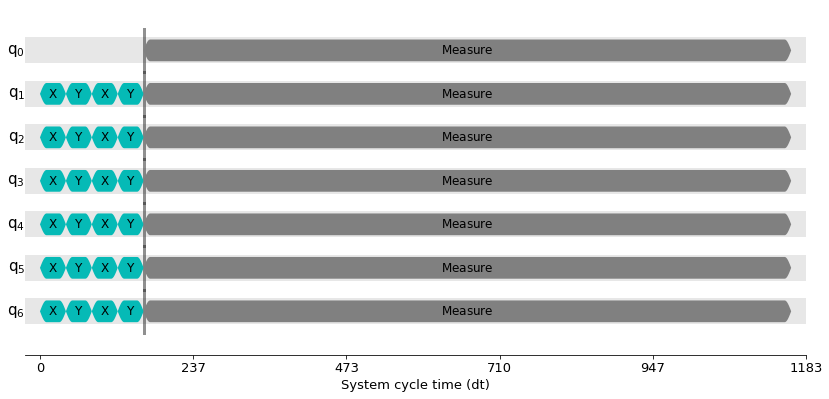

In [6]:
timeline_drawer(circ_dd)


In [8]:
from qiskit import schedule, QuantumCircuit, transpile, IBMQ
transpiled_circ = transpile(circ, ibmq_backend_real)

In [10]:
job=ibmq_backend_real.run(transpiled_circ)

In [13]:
print(job.job_id())


62b9eee9e47a7376401a4bad


In [14]:
from qiskit.result import marginal_counts
from qiskit.providers.ibmq.job import job_monitor
from qiskit.tools.visualization import plot_histogram
job_monitor(job)

Job Status: job has successfully run


In [15]:
simp_counts1 = marginal_counts(job.result(), indices=[0]).get_counts()

In [16]:
print("Meas 1 result: ", simp_counts1)

Meas 1 result:  {'0': 4000}
